In [ ]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/ATM_MOD/NOVI_SAD/NoviSad_GFv1.csv')
# Get unique names




# Get unique names
unique_names = df['name'].unique()



# Create separate DataFrames for each unique name
for name in unique_names:
    globals()[f"station_{name.replace('-', '_')}"] = df[df['name'] == name].reset_index(drop=True)



In [ ]:
station_coordinates=  pd.read_csv('/content/drive/MyDrive/ATM_MOD/NOVI_SAD/NoviSad_coordinates.csv')

# Selecting specific columns from df_all and renaming them
station_s10_1 = station_s10_1.rename(columns={'value': 'Temperature'})
station_s2_1 = station_s2_1.rename(columns={'value': 'Temperature'})
station_s3_1 = station_s3_1.rename(columns={'value': 'Temperature'})
station_s5_1 = station_s5_1.rename(columns={'value': 'Temperature'})
station_s5_3 = station_s5_3.rename(columns={'value': 'Temperature'})
station_s5_6 = station_s5_6.rename(columns={'value': 'Temperature'})
station_s6_1 = station_s6_1.rename(columns={'value': 'Temperature'})
station_s6_2 = station_s6_2.rename(columns={'value': 'Temperature'})
station_s6_3 = station_s6_3.rename(columns={'value': 'Temperature'})
station_s6_5 = station_s6_5.rename(columns={'value': 'Temperature'})
station_s6_6 = station_s6_6.rename(columns={'value': 'Temperature'})
station_s6_7 = station_s6_7.rename(columns={'value': 'Temperature'})
station_s9_1 = station_s9_1.rename(columns={'value': 'Temperature'})
station_s9_2 = station_s9_2.rename(columns={'value': 'Temperature'})
station_s9_3 = station_s9_3.rename(columns={'value': 'Temperature'})
station_sA_1 = station_sA_1.rename(columns={'value': 'Temperature'})
station_sD_1 = station_sD_1.rename(columns={'value': 'Temperature'})


station_s10_1['Station'] = 's10-1'
station_s2_1['Station'] = 's2-1'
station_s3_1['Station'] = 's3-1'
station_s5_1['Station'] = 's5-1'
station_s5_3['Station'] = 's5-3'
station_s5_6['Station'] = 's5-6'
station_s6_1['Station'] = 's6-1'
station_s6_2['Station'] = 's6-2'
station_s6_3['Station'] = 's6-3'
station_s6_5['Station'] = 's6-5'
station_s6_6['Station'] = 's6-6'
station_s6_7['Station'] = 's6-7'
station_s9_1['Station'] = 's9-1'
station_s9_2['Station'] = 's9-2'
station_s9_3['Station'] = 's9-3'
station_sA_1['Station'] = 'sA-1'
station_sD_1['Station'] = 'sD-1'

# Define a list of all station dataframes
all_station_dataframes = [station_s10_1, station_s2_1, station_s3_1, station_s5_1, station_s5_3,
                          station_s5_6, station_s6_1, station_s6_2,
                          station_s6_3, station_s6_5, station_s6_6, station_s6_7,
                          station_s9_1, station_s9_2,
                          station_s9_3, station_sA_1, station_sD_1]

for df in all_station_dataframes:
    station_name = df['Station'].iloc[0]
    lat_long = station_coordinates[station_coordinates['Station'] == station_name][['lat', 'long']]
    df['lat'] = lat_long['lat'].values[0]
    df['long'] = lat_long['long'].values[0]
    globals()[f"station_{station_name.replace('-', '_')}"] = df


In [ ]:
from collections.abc import Mapping
#import xarray as xr
#import rioxarray as rxr
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

# Read the CSV files into DataFrames
df = pd.read_csv('/content/drive/MyDrive/ATM_MOD/NOVI_SAD/NOVI_2016_2017.csv')
df_all = pd.read_csv('/content/drive/MyDrive/ATM_MOD/NOVI_SAD/NoviSad_12.csv')

station_coordinates=  pd.read_csv('/content/drive/MyDrive/ATM_MOD/NOVI_SAD/NoviSad_coordinates.csv')
import pandas as pd

# Assuming df_all contains the original data

# Selecting specific columns from df_all and renaming them
station_s2_2 = df_all[['DateTime', 's2-2']].rename(columns={'s2-2': 'Temperature'})
station_s2_3 = df_all[['DateTime', 's2-3']].rename(columns={'s2-3': 'Temperature'})
station_s3_2 = df_all[['DateTime', 's3-2']].rename(columns={'s3-2': 'Temperature'})
station_s5_2 = df_all[['DateTime', 's5-2']].rename(columns={'s5-2': 'Temperature'})
station_s5_3 = df_all[['DateTime', 's5-3']].rename(columns={'s5-3': 'Temperature'})
station_s5_4 = df_all[['DateTime', 's5-4']].rename(columns={'s5-4': 'Temperature'})
station_s5_5 = df_all[['DateTime', 's5-5']].rename(columns={'s5-5': 'Temperature'})
station_s6_4 = df_all[['DateTime', 's6-4']].rename(columns={'s6-4': 'Temperature'})
station_s6_8 = df_all[['DateTime', 's6-8']].rename(columns={'s6-8': 'Temperature'})
station_s6_9 = df_all[['DateTime', 's6-9']].rename(columns={'s6-9': 'Temperature'})
station_s8_1 = df_all[['DateTime', 's8-1']].rename(columns={'s8-1': 'Temperature'})

# Assigning 'Station' column to each dataframe
station_s2_2['Station'] = 's2-2'
station_s2_3['Station'] = 's2-3'
station_s3_2['Station'] = 's3-2'
station_s5_2['Station'] = 's5-2'
station_s5_3['Station'] = 's5-3'
station_s5_4['Station'] = 's5-4'
station_s5_5['Station'] = 's5-5'
station_s6_4['Station'] = 's6-4'
station_s6_8['Station'] = 's6-8'
station_s6_9['Station'] = 's6-9'
station_s8_1['Station'] = 's8-1'

# Update each dataframe with latitude and longitude information
station_s2_2 = pd.merge(station_s2_2, station_coordinates, on='Station')
station_s2_3 = pd.merge(station_s2_3, station_coordinates, on='Station')
station_s3_2 = pd.merge(station_s3_2, station_coordinates, on='Station')
station_s5_2 = pd.merge(station_s5_2, station_coordinates, on='Station')
station_s5_3 = pd.merge(station_s5_3, station_coordinates, on='Station')
station_s5_4 = pd.merge(station_s5_4, station_coordinates, on='Station')
station_s5_5 = pd.merge(station_s5_5, station_coordinates, on='Station')
station_s6_4 = pd.merge(station_s6_4, station_coordinates, on='Station')
station_s6_8 = pd.merge(station_s6_8, station_coordinates, on='Station')
station_s6_9 = pd.merge(station_s6_9, station_coordinates, on='Station')
station_s8_1 = pd.merge(station_s8_1, station_coordinates, on='Station')



















In [ ]:
import math

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

def find_nearest_point(station, x_list, y_list):
    station_lat, station_lon = station['lat'], station['long']
    min_distance = float('inf')
    best_x, best_y = None, None

    for x, y in zip(x_list, y_list):
        distance = haversine(station_lat, station_lon, y, x)
        if distance < min_distance:
            min_distance = distance
            best_x, best_y = x, y

    return {'x': best_x, 'y': best_y, 'min_distance': min_distance}




In [ ]:
x_list = df['x']
y_list = df['y']

station_names = ['station_s2_2', 'station_s2_3', 'station_s3_2', 'station_s5_2', 'station_s5_3',
                 'station_s5_4', 'station_s5_5', 'station_s6_4', 'station_s6_8', 'station_s6_9',
                 'station_s8_1', 'station_s10_1', 'station_s2_1', 'station_s3_1', 'station_s5_1',
                 'station_s5_3', 'station_s5_4', 'station_s5_5', 'station_s5_6', 'station_s6_1',
                 'station_s6_2', 'station_s6_3', 'station_s6_4', 'station_s6_5', 'station_s6_6',
                 'station_s6_7', 'station_s6_8', 'station_s6_9', 'station_s8_1', 'station_s9_1',
                 'station_s9_2', 'station_s9_3', 'station_sA_1', 'station_sD_1']

for station_name, station_df in zip(station_names, [station_s2_2, station_s2_3, station_s3_2, station_s5_2, station_s5_3,
                                                    station_s5_4, station_s5_5, station_s6_4, station_s6_8, station_s6_9,
                                                    station_s8_1, station_s10_1, station_s2_1, station_s3_1, station_s5_1,
                                                    station_s5_3, station_s5_4, station_s5_5, station_s5_6, station_s6_1,
                                                    station_s6_2, station_s6_3, station_s6_4, station_s6_5, station_s6_6,
                                                    station_s6_7, station_s6_8, station_s6_9, station_s8_1, station_s9_1,
                                                    station_s9_2, station_s9_3, station_sA_1, station_sD_1]):
    # Initialize variables to store the nearest coordinates
    nearest_x, nearest_y = None, None
    min_distance = float('inf')

    # Get the coordinates of the station
    station_lat = station_df['lat'] if isinstance(station_df['lat'], float) else float(station_df['lat'].values[0])
    station_long = station_df['long'] if isinstance(station_df['long'], float) else float(station_df['long'].values[0])

    # Loop over each x and y coordinate
    for x, y in zip(x_list, y_list):
        # Calculate distance between station and current x, y coordinate
        distance = haversine(station_lat, station_long, y, x)
        # If distance is smaller than current minimum distance, update nearest coordinates
        if distance < min_distance:
            min_distance = distance
            nearest_x, nearest_y = x, y

    # Print dictionary entry for the station with nearest coordinates
    print(f"'{station_name}': {{'y': ({station_lat}, {nearest_y}), 'x': ({station_long}, {nearest_x})}}: {min_distance}km")


'station_s2_2': {'y': (45.249166, 45.249146), 'x': (19.837222, 19.836735)}: 0.038189130103517356km
'station_s2_3': {'y': (45.261388, 45.26175), 'x': (19.848888, 19.849337)}: 0.05343424224094354km
'station_s3_2': {'y': (45.233333, 45.23311), 'x': (19.809722, 19.809238)}: 0.045291083940263765km
'station_s5_2': {'y': (45.25, 45.250294), 'x': (19.816111, 19.816113)}: 0.032691683342062544km
'station_s5_3': {'y': (45.2625, 45.262897), 'x': (19.826388, 19.826424)}: 0.04423421085043753km
'station_s5_4': {'y': (45.238055, 45.23769), 'x': (19.832777, 19.833298)}: 0.05754469947942502km
'station_s5_5': {'y': (45.253055, 45.252583), 'x': (19.8475, 19.847046)}: 0.06338428009126224km
'station_s6_4': {'y': (45.233611, 45.23311), 'x': (19.791944, 19.792053)}: 0.05635873039968175km
'station_s6_8': {'y': (45.251388, 45.25144), 'x': (19.875555, 19.875689)}: 0.011977717055963356km
'station_s6_9': {'y': (45.240555, 45.241127), 'x': (19.881111, 19.881416)}: 0.06793868765755572km
'station_s8_1': {'y': (45.272

In [ ]:
coordinates_mapping = {
    'station_s2_2': {'y': (45.249166, 45.249146), 'x': (19.837222, 19.836735)},
    'station_s2_3': {'y': (45.261388, 45.26175), 'x': (19.848888, 19.849337)},
    'station_s3_2': {'y': (45.233333, 45.23311), 'x': (19.809722, 19.809238)},
    'station_s5_2': {'y': (45.25, 45.250294), 'x': (19.816111, 19.816113)},
    'station_s5_3': {'y': (45.2625, 45.262897), 'x': (19.826388, 19.826424)},
    'station_s5_4': {'y': (45.238055, 45.23769), 'x': (19.832777, 19.833298)},
    'station_s5_5': {'y': (45.253055, 45.252583), 'x': (19.8475, 19.847046)},
    'station_s6_4': {'y': (45.233611, 45.23311), 'x': (19.791944, 19.792053)},
    'station_s6_8': {'y': (45.251388, 45.25144), 'x': (19.875555, 19.875689)},
    'station_s6_9': {'y': (45.240555, 45.241127), 'x': (19.881111, 19.881416)},
    'station_s8_1': {'y': (45.272369, 45.27206), 'x': (19.820833, 19.820694)},
    'station_s10_1': {'y': (45.267456, 45.26748), 'x': (19.883928, 19.883707)},
    'station_s2_1': {'y': (45.258055, 45.258312), 'x': (19.814722, 19.814966)},
    'station_s3_1': {'y': (45.243055, 45.24342), 'x': (19.806388, 19.806946)},
    'station_s5_1': {'y': (45.252222, 45.252583), 'x': (19.798333, 19.797781)},
    'station_s5_3': {'y': (45.2625, 45.262897), 'x': (19.826388, 19.826424)},
    'station_s5_4': {'y': (45.238055, 45.23769), 'x': (19.832777, 19.833298)},
    'station_s5_5': {'y': (45.253055, 45.252583), 'x': (19.8475, 19.847046)},
    'station_s5_6': {'y': (45.2425, 45.24227), 'x': (19.847222, 19.847046)},
    'station_s6_1': {'y': (45.2552, 45.254875), 'x': (19.7633, 19.76341)},
    'station_s6_2': {'y': (45.276944, 45.276646), 'x': (19.781388, 19.781742)},
    'station_s6_3': {'y': (45.243333, 45.24342), 'x': (19.782222, 19.781742)},
    'station_s6_4': {'y': (45.233611, 45.23311), 'x': (19.791944, 19.792053)},
    'station_s6_5': {'y': (45.286994, 45.286957), 'x': (19.828336, 19.828714)},
    'station_s6_6': {'y': (45.29873, 45.298412), 'x': (19.82254, 19.822987)},
    'station_s6_7': {'y': (45.2225, 45.222797), 'x': (19.845555, 19.8459)},
    'station_s6_8': {'y': (45.251388, 45.25144), 'x': (19.875555, 19.875689)},
    'station_s6_9': {'y': (45.240555, 45.241127), 'x': (19.881111, 19.881416)},
    'station_s8_1': {'y': (45.272369, 45.27206), 'x': (19.820833, 19.820694)},
    'station_s9_1': {'y': (45.235, 45.235397), 'x': (19.768055, 19.767994)},
    'station_s9_2': {'y': (45.299166, 45.299557), 'x': (19.811666, 19.81153)},
    'station_s9_3': {'y': (45.239166, 45.238834), 'x': (19.866388, 19.866522)},
    'station_sA_1': {'y': (45.294728, 45.294975), 'x': (19.886231, 19.886)}
}













# Mapping coordinates: obs-> model
#coordinates_mapping = {
#    'station_s2_2': {'y': (45.249166, 45.249146), 'x': (19.837222, 19.836735)},
#    'station_s2_3': {'y': (45.261388, 45.26175), 'x': (19.84888, 19.849337)},
#    'station_s3_2': {'y': (45.233333, 45.23311), 'x': (19.809722, 19.814966)},
#    'station_s5_2': {'y': (45.25, 45.250294), 'x': (19.816111, 19.816113)},
#    'station_s5_3': {'y': (45.2625, 45.262897), 'x': (19.826388, 19.826424)},
#    'station_s5_4': {'y': (45.238055, 45.23769), 'x': (19.832777, 19.833298)},
#    'station_s5_5': {'y': (45.253055, 45.252583), 'x': (19.8475, 19.847046)},
#    'station_s6_4': {'y': (45.233611, 45.23311), 'x': (19.791944, 19.792053)},
#    'station_s6_8': {'y': (45.251388, 45.25144), 'x': (19.875555, 19.875689)},
#    'station_s6_9': {'y': (45.240555, 45.241127), 'x': (19.881111, 19.881416)},
#    'station_s8_1': {'y': (45.272369, 45.27206), 'x': (19.820833, 19.820694)},
#    'station_s10_1': {'y': (latitude_min, latitude_max), 'x': (longitude_min, longitude_max)},
#    'station_s5_6': {'y': (latitude_min, latitude_max), 'x': (longitude_min, longitude_max)},
#    'station_s6_1': {'y': (latitude_min, latitude_max), 'x': (longitude_min, longitude_max)},
#    'station_s6_2': {'y': (latitude_min, latitude_max), 'x': (longitude_min, longitude_max)},
#    'station_s6_3': {'y': (latitude_min, latitude_max), 'x': (longitude_min, longitude_max)},
#    'station_s6_5': {'y': (latitude_min, latitude_max), 'x': (longitude_min, longitude_max)},
#    'station_s6_6': {'y': (latitude_min, latitude_max), 'x': (longitude_min, longitude_max)},
#    'station_s6_7': {'y': (latitude_min, latitude_max), 'x': (longitude_min, longitude_max)},
#    'station_s9_1': {'y': (latitude_min, latitude_max), 'x': (longitude_min, longitude_max)},
#    'station_s9_2': {'y': (latitude_min, latitude_max), 'x': (longitude_min, longitude_max)},
#    'station_s9_3': {'y': (latitude_min, latitude_max), 'x': (longitude_min, longitude_max)},
#    'station_sA_1': {'y': (latitude_min, latitude_max), 'x': (longitude_min, longitude_max)},
#    'station_sD_1': {'y': (latitude_min, latitude_max), 'x': (longitude_min, longitude_max)}
#}








# Iterate over each station and add new coordinates
for station_name, coordinates in coordinates_mapping.items():
    station_df = globals()[station_name]  # Get the DataFrame for the station
    station_df['x'] = coordinates['x'][1]  # Add 'x_model' column with the first x coordinate rounded to 4 decimals
    station_df['y'] = coordinates['y'][1]
          # Add 'y_model' column with the first y coordinate rounded to 4 decimals










common_columns = ['Temperature', 'lat', 'long', 'x', 'y', 'DateTime']



# Assuming station_s2_2, station_s2_3, etc. are your DataFrames

# Select common columns





# Assuming station_s2_2, station_s2_3, etc. are your DataFrames

data_frames = [station_s2_2, station_s2_3, station_s3_2, station_s5_2, station_s5_3,
               station_s5_4, station_s5_5, station_s6_4, station_s6_8, station_s6_9,
               station_s8_1, station_s10_1, station_s2_1, station_s3_1, station_s5_1,
               station_s5_6, station_s6_1, station_s6_2, station_s6_3, station_s6_5,
               station_s6_6, station_s6_7, station_s9_1, station_s9_2, station_s9_3,
               station_sA_1]


common_columns = ['Station','DateTime','Temperature', 'lat', 'long', 'x', 'y']

# Concatenate DataFrames
observation_data = pd.concat([station_s2_2[common_columns].dropna(), station_s2_3[common_columns].dropna(),
                              station_s3_2[common_columns].dropna(), station_s5_2[common_columns].dropna(),
                              station_s5_3[common_columns].dropna(), station_s5_4[common_columns].dropna(),
                              station_s5_5[common_columns].dropna(), station_s6_4[common_columns].dropna(),
                              station_s6_8[common_columns].dropna(), station_s6_9[common_columns].dropna(),
                              station_s8_1[common_columns].dropna(), station_s10_1[common_columns].dropna(),
                              station_s2_1[common_columns].dropna(), station_s3_1[common_columns].dropna(),
                              station_s5_1[common_columns].dropna(), station_s5_6[common_columns].dropna(),
                              station_s6_1[common_columns].dropna(), station_s6_2[common_columns].dropna(),
                              station_s6_3[common_columns].dropna(), station_s6_5[common_columns].dropna(),
                              station_s6_6[common_columns].dropna(), station_s6_7[common_columns].dropna(),
                              station_s9_1[common_columns].dropna(), station_s9_2[common_columns].dropna(),
                              station_s9_3[common_columns].dropna(), station_sA_1[common_columns].dropna()],
                             ignore_index=True)

df = pd.read_csv('/content/drive/MyDrive/ATM_MOD/NOVI_SAD/NOVI_2016_2017.csv')

df['DateTime'] = pd.to_datetime(df['time'])
df['x'] = df['x']
df['y'] = df['y']
observation_data['DateTime'] = pd.to_datetime(observation_data['DateTime'])
test = pd.merge(observation_data, df, on=['x', 'y', 'DateTime'], how='inner')
unique_stations = test['Station'].unique()

In [ ]:


# Count NaN values per column before dropping
test_nan_before_drop = test.isnull().sum()

# Drop rows with NaN values in 'T_TARGET' column
test = test.dropna(subset=['T_TARGET'])

test = test.rename(columns={'T_2M': 'T2M_NC'})
test = test.rename(columns={'T_2M_COR': 'T2M'})

test['T2M_difference'] = test['T_TARGET'] - test['T2M']
test['T2M'] = test['T2M'] - 273.15
test['T2M_NC'] = test['T2M_NC'] - 273.15

test = test.dropna(subset=['T2M_difference'])

# Count NaN values per column after dropping 'T_TARGET'
test_nan_after_drop = test.isnull().sum()

# Fill NaN values with 0 in 'CBH' column

# Count NaN values per column after filling with 0
test_nan_after_fill = test.isnull().sum()

# Fill NaN values with the median value of the specific 'City'
for column in test.columns:
    if test[column].isnull().any():
        test[column] = test.groupby('city')[column].transform(lambda x: x.fillna(x.median()))







# Count NaN values per column after filling with median
test_nan_after_median_fill = test.isnull().sum()

# Calculate number of NaN values filled and dropped per column
test_nan_filled = test_nan_before_drop - test_nan_after_fill

test_nan_dropped = test_nan_after_drop - test_nan_after_median_fill

# Writing results to a file
with open('run_time.txt', 'a') as f:
    f.write("NaN values filled per column before dropping 'T_TARGET':\n")
    f.write("Test Data:\n")
    f.write(test_nan_filled.to_string() + "\n")
    f.write("\n")
    f.write("NaN values dropped per column after dropping 'T_TARGET':\n")
    f.write("Test Data:\n")
    f.write(test_nan_dropped.to_string() + "\n")


y_test = test['T2M_difference']
X_test = test[['LC_CORINE', 'IMPERV', 'HEIGHT', 'COAST', 'ELEV', 'POP', 'RH', 'SP', 'PRECIP','T2M', 'WS', 'TCC', 'CAPE', 'BLH', 'SSR', 'SOLAR_ELEV', 'DECL']]
import matplotlib.pyplot as plt
import pandas as pd
import joblib

# Define temporal and spatial features
temporal_feat = [ 'RH', 'SP', 'PRECIP', 'T2M', 'WS','TCC',  'CAPE', 'BLH', 'SSR', 'SOLAR_ELEV', 'DECL']
spatial_feat = ['LC_CORINE', 'IMPERV', 'HEIGHT',  'COAST', 'ELEV', 'POP']

# Load the model
model = joblib.load("/content/drive/MyDrive/ATM_MOD/GHENT/model_FINAL.joblib")


# Make predictions
y_pred = model.predict(X_test)+X_test['T2M']
y_test=test['T2M_difference'] +X_test['T2M']

test['y_pred']=y_pred
test['y_test']=y_test
test['ERA5']=X_test['T2M']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


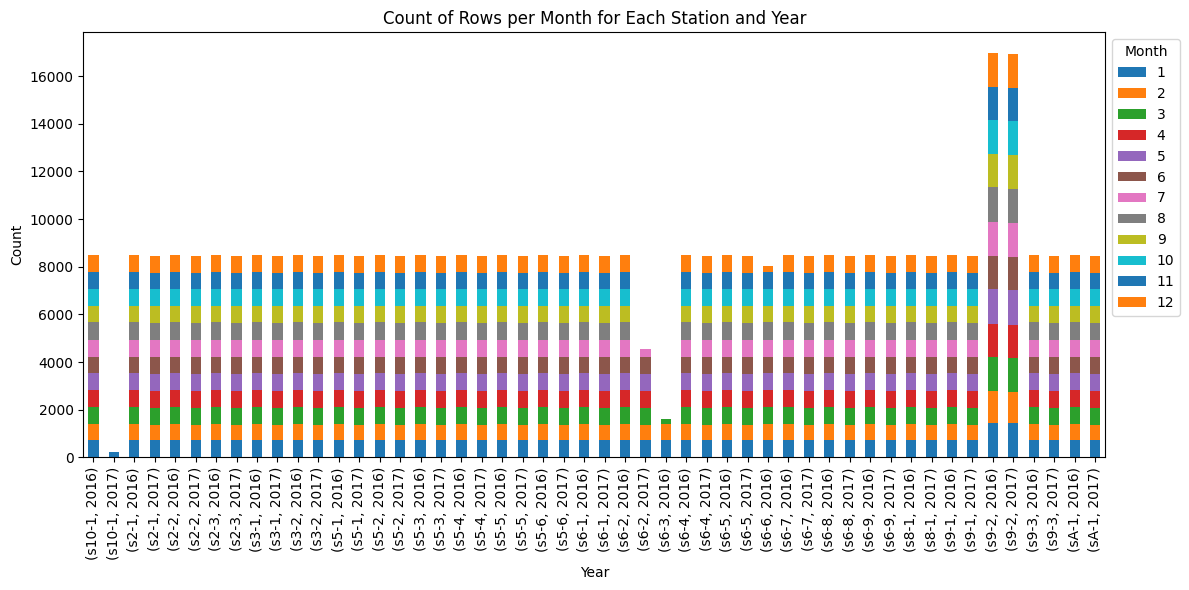

In [ ]:
test['Station'].unique()

#how many obs per month per year


import pandas as pd
import matplotlib.pyplot as plt
df=test
# Assuming 'test' is your DataFrame
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract year and month from the DateTime column
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month

# Group by station, year, and month and count rows in each group
rows_per_station_per_year_per_month = df.groupby(['Station', 'Year', 'Month']).size()

# Unstack the multi-index to make it easier to plot
rows_per_station_per_year_per_month = rows_per_station_per_year_per_month.unstack(level='Month')

# Plotting
rows_per_station_per_year_per_month.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Rows per Month for Each Station and Year')
plt.legend(title='Month', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
test['Year'] = test['DateTime'].dt.year
test['Month'] = test['DateTime'].dt.month
test = test[~((test['Station'] == 's10-1') & (test['Year'] == 2017))]
test = test[~((test['Station'] == 's6-3') & (test['Year'] == 2016))]
test = test[~((test['Station'] == 's6-3') & (test['Year'] == 2017))]
test = test[~((test['Station'] == 's6-2') & (test['Year'] == 2017))]


In [ ]:
station_years = test.groupby('Station')['Year'].unique()

for station, years in station_years.items():
    print(f"Station {station} has data for the following years: {', '.join(map(str, years))}")


Station s10-1 has data for the following years: 2016
Station s2-1 has data for the following years: 2016, 2017
Station s2-2 has data for the following years: 2016, 2017
Station s2-3 has data for the following years: 2016, 2017
Station s3-1 has data for the following years: 2016, 2017
Station s3-2 has data for the following years: 2016, 2017
Station s5-1 has data for the following years: 2016, 2017
Station s5-2 has data for the following years: 2016, 2017
Station s5-3 has data for the following years: 2016, 2017
Station s5-4 has data for the following years: 2016, 2017
Station s5-5 has data for the following years: 2016, 2017
Station s5-6 has data for the following years: 2016, 2017
Station s6-1 has data for the following years: 2016, 2017
Station s6-2 has data for the following years: 2016
Station s6-4 has data for the following years: 2016, 2017
Station s6-5 has data for the following years: 2016, 2017
Station s6-6 has data for the following years: 2016
Station s6-7 has data for the f

In [ ]:
test['y']

0         45.249146
1         45.249146
2         45.249146
3         45.249146
4         45.249146
            ...    
421678    45.294975
421679    45.294975
421680    45.294975
421681    45.294975
421682    45.294975
Name: y, Length: 415282, dtype: float64

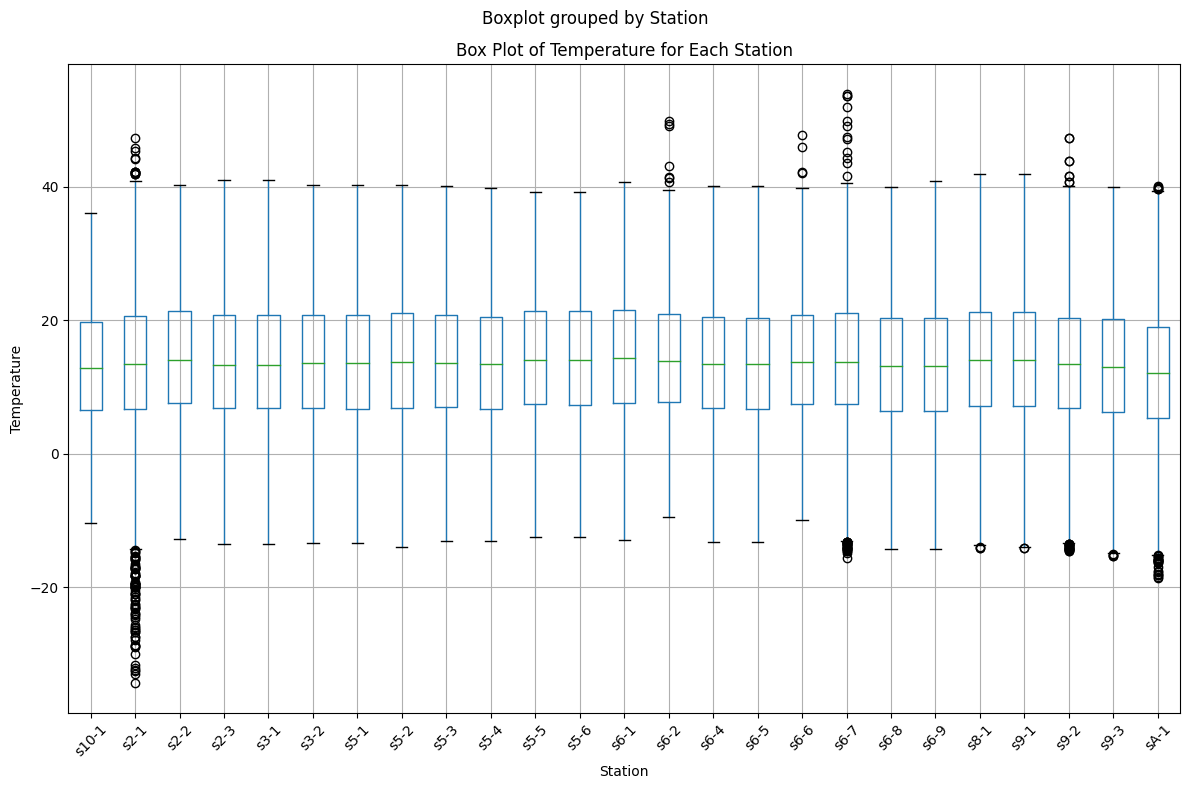

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'test' is your DataFrame

# Create separate box plots for 'Temperature' column for each 'Station'
test.boxplot(column='Temperature', by='Station', figsize=(12, 8))

# Add labels and title
plt.xlabel('Station')
plt.ylabel('Temperature')
plt.title('Box Plot of Temperature for Each Station')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **FINAL SET OF STATIONS**

In [ ]:
test['Station'].unique()

array(['s2-2', 's2-3', 's3-2', 's5-2', 's5-3', 's5-4', 's5-5', 's6-4',
       's6-8', 's6-9', 's8-1', 's10-1', 's2-1', 's3-1', 's5-1', 's5-6',
       's6-1', 's6-2', 's6-5', 's6-6', 's6-7', 's9-1', 's9-2', 's9-3',
       'sA-1'], dtype=object)

## **CALCULATE SCORES**

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate bias
bias_y_pred_vs_y_test = np.mean(test['y_pred'] - test['y_test'])
bias_y_pred_vs_Temperature = np.mean(test['y_pred'] - test['Temperature'])
bias_y_test_vs_Temperature = np.mean(test['y_test'] - test['Temperature'])
bias_ERA5_vs_Temperature = np.mean(test['ERA5'] - test['Temperature'])

# Calculate RMSE
rmse_y_pred_vs_y_test = np.sqrt(mean_squared_error(test['y_test'], test['y_pred']))
rmse_y_pred_vs_Temperature = np.sqrt(mean_squared_error(test['Temperature'], test['y_pred']))
rmse_y_test_vs_Temperature = np.sqrt(mean_squared_error(test['Temperature'], test['y_test']))
rmse_ERA5_vs_Temperature = np.sqrt(mean_squared_error(test['Temperature'], test['ERA5']))

# Calculate MAE
mae_y_pred_vs_y_test = mean_absolute_error(test['y_test'], test['y_pred'])
mae_y_pred_vs_Temperature = mean_absolute_error(test['Temperature'], test['y_pred'])
mae_y_test_vs_Temperature = mean_absolute_error(test['Temperature'], test['y_test'])
mae_ERA5_vs_Temperature = mean_absolute_error(test['Temperature'], test['ERA5'])


print("Bias (EURO-RFUE vs UrbClim):", round(bias_y_pred_vs_y_test, 3))
print("RMSE (EURO-RFUE vs UrbClim):", round(rmse_y_pred_vs_y_test, 3))
print("MAE (EURO-RFUE vs UrbClim):", round(mae_y_pred_vs_y_test, 3))

print("\nBias (EURO-RFUE vs Observation):", round(bias_y_pred_vs_Temperature, 3))
print("RMSE (EURO-RFUE vs Observation):", round(rmse_y_pred_vs_Temperature, 3))
print("MAE (EURO-RFUE vs Observation):", round(mae_y_pred_vs_Temperature, 3))

print("\nBias (UrbClim vs Observation):", round(bias_y_test_vs_Temperature, 3))
print("RMSE (UrbClim vs Observation):", round(rmse_y_test_vs_Temperature, 3))
print("MAE (UrbClim vs Observation):", round(mae_y_test_vs_Temperature, 3))

print("\nBias (ERA5 vs Observation):", round(bias_ERA5_vs_Temperature, 3))
print("RMSE (ERA5 vs Observation):", round(rmse_ERA5_vs_Temperature, 3))
print("MAE (ERA5 vs Observation):", round(mae_ERA5_vs_Temperature, 3))



Bias (EURO-RFUE vs UrbClim): -0.188
RMSE (EURO-RFUE vs UrbClim): 1.405
MAE (EURO-RFUE vs UrbClim): 1.067

Bias (EURO-RFUE vs Observation): 0.593
RMSE (EURO-RFUE vs Observation): 2.099
MAE (EURO-RFUE vs Observation): 1.513

Bias (UrbClim vs Observation): 0.782
RMSE (UrbClim vs Observation): 2.528
MAE (UrbClim vs Observation): 1.833

Bias (ERA5 vs Observation): -0.703
RMSE (ERA5 vs Observation): 1.954
MAE (ERA5 vs Observation): 1.365


In [ ]:
test_night=test[test['SOLAR_ELEV']<0]
# Calculate bias
bias_y_pred_vs_y_test = np.mean(test_night['y_pred'] - test_night['y_test'])
bias_y_pred_vs_Temperature = np.mean(test_night['y_pred'] - test_night['Temperature'])
bias_y_test_vs_Temperature = np.mean(test_night['y_test'] - test_night['Temperature'])
bias_ERA5_vs_Temperature = np.mean(test_night['ERA5'] - test_night['Temperature'])

# Calculate RMSE
rmse_y_pred_vs_y_test = np.sqrt(mean_squared_error(test_night['y_test'], test_night['y_pred']))
rmse_y_pred_vs_Temperature = np.sqrt(mean_squared_error(test_night['Temperature'], test_night['y_pred']))
rmse_y_test_vs_Temperature = np.sqrt(mean_squared_error(test_night['Temperature'], test_night['y_test']))
rmse_ERA5_vs_Temperature = np.sqrt(mean_squared_error(test_night['Temperature'], test_night['ERA5']))

# Calculate MAE
mae_y_pred_vs_y_test = mean_absolute_error(test_night['y_test'], test_night['y_pred'])
mae_y_pred_vs_Temperature = mean_absolute_error(test_night['Temperature'], test_night['y_pred'])
mae_y_test_vs_Temperature = mean_absolute_error(test_night['Temperature'], test_night['y_test'])
mae_ERA5_vs_Temperature = mean_absolute_error(test_night['Temperature'], test_night['ERA5'])

print("Bias (EURO-RFUE vs UrbClim):", round(bias_y_pred_vs_y_test, 3))
print("RMSE (EURO-RFUE vs UrbClim):", round(rmse_y_pred_vs_y_test, 3))
print("MAE (EURO-RFUE vs UrbClim):", round(mae_y_pred_vs_y_test, 3))

print("\nBias (EURO-RFUE vs Observation):", round(bias_y_pred_vs_Temperature, 3))
print("RMSE (EURO-RFUE vs Observation):", round(rmse_y_pred_vs_Temperature, 3))
print("MAE (EURO-RFUE vs Observation):", round(mae_y_pred_vs_Temperature, 3))

print("\nBias (UrbClim vs Observation):", round(bias_y_test_vs_Temperature, 3))
print("RMSE (UrbClim vs Observation):", round(rmse_y_test_vs_Temperature, 3))
print("MAE (UrbClim vs Observation):", round(mae_y_test_vs_Temperature, 3))

print("\nBias (ERA5 vs Observation):", round(bias_ERA5_vs_Temperature, 3))
print("RMSE (ERA5 vs Observation):", round(rmse_ERA5_vs_Temperature, 3))
print("MAE (ERA5 vs Observation):", round(mae_ERA5_vs_Temperature, 3))



Bias (EURO-RFUE vs UrbClim): -0.326
RMSE (EURO-RFUE vs UrbClim): 1.546
MAE (EURO-RFUE vs UrbClim): 1.182

Bias (EURO-RFUE vs Observation): 1.195
RMSE (EURO-RFUE vs Observation): 2.392
MAE (EURO-RFUE vs Observation): 1.776

Bias (UrbClim vs Observation): 1.521
RMSE (UrbClim vs Observation): 2.912
MAE (UrbClim vs Observation): 2.191

Bias (ERA5 vs Observation): -0.958
RMSE (ERA5 vs Observation): 2.129
MAE (ERA5 vs Observation): 1.511


In [ ]:
test_day=test[test['SOLAR_ELEV']>0]
# Calculate bias
bias_y_pred_vs_y_test = np.mean(test_day['y_pred'] - test_day['y_test'])
bias_y_pred_vs_Temperature = np.mean(test_day['y_pred'] - test_day['Temperature'])
bias_y_test_vs_Temperature = np.mean(test_day['y_test'] - test_day['Temperature'])
bias_ERA5_vs_Temperature = np.mean(test_day['ERA5'] - test_day['Temperature'])

# Calculate RMSE
rmse_y_pred_vs_y_test = np.sqrt(mean_squared_error(test_day['y_test'], test_day['y_pred']))
rmse_y_pred_vs_Temperature = np.sqrt(mean_squared_error(test_day['Temperature'], test_day['y_pred']))
rmse_y_test_vs_Temperature = np.sqrt(mean_squared_error(test_day['Temperature'], test_day['y_test']))
rmse_ERA5_vs_Temperature = np.sqrt(mean_squared_error(test_day['Temperature'], test_day['ERA5']))

# Calculate MAE
mae_y_pred_vs_y_test = mean_absolute_error(test_day['y_test'], test_day['y_pred'])
mae_y_pred_vs_Temperature = mean_absolute_error(test_day['Temperature'], test_day['y_pred'])
mae_y_test_vs_Temperature = mean_absolute_error(test_day['Temperature'], test_day['y_test'])
mae_ERA5_vs_Temperature = mean_absolute_error(test_day['Temperature'], test_day['ERA5'])

print("Bias (EURO-RFUE vs UrbClim):", round(bias_y_pred_vs_y_test, 3))
print("RMSE (EURO-RFUE vs UrbClim):", round(rmse_y_pred_vs_y_test, 3))
print("MAE (EURO-RFUE vs UrbClim):", round(mae_y_pred_vs_y_test, 3))

print("\nBias (EURO-RFUE vs Observation):", round(bias_y_pred_vs_Temperature, 3))
print("RMSE (EURO-RFUE vs Observation):", round(rmse_y_pred_vs_Temperature, 3))
print("MAE (EURO-RFUE vs Observation):", round(mae_y_pred_vs_Temperature, 3))

print("\nBias (UrbClim vs Observation):", round(bias_y_test_vs_Temperature, 3))
print("RMSE (UrbClim vs Observation):", round(rmse_y_test_vs_Temperature, 3))
print("MAE (UrbClim vs Observation):", round(mae_y_test_vs_Temperature, 3))

print("\nBias (ERA5 vs Observation):", round(bias_ERA5_vs_Temperature, 3))
print("RMSE (ERA5 vs Observation):", round(rmse_ERA5_vs_Temperature, 3))
print("MAE (ERA5 vs Observation):", round(mae_ERA5_vs_Temperature, 3))



Bias (EURO-RFUE vs UrbClim): -0.051
RMSE (EURO-RFUE vs UrbClim): 1.249
MAE (EURO-RFUE vs UrbClim): 0.952

Bias (EURO-RFUE vs Observation): -0.006
RMSE (EURO-RFUE vs Observation): 1.759
MAE (EURO-RFUE vs Observation): 1.252

Bias (UrbClim vs Observation): 0.045
RMSE (UrbClim vs Observation): 2.075
MAE (UrbClim vs Observation): 1.476

Bias (ERA5 vs Observation): -0.448
RMSE (ERA5 vs Observation): 1.764
MAE (ERA5 vs Observation): 1.219


<ipython-input-17-c8c2a74b62a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateTime'] = pd.to_datetime(df['DateTime'])


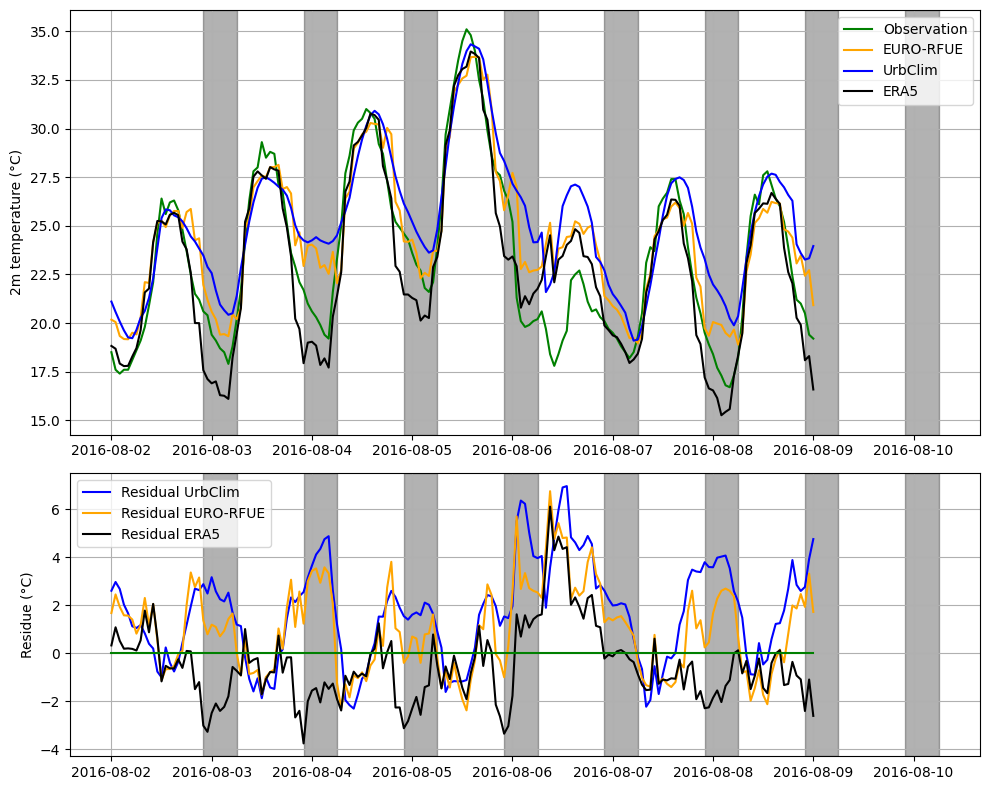

In [ ]:
import matplotlib.pyplot as plt
df = test[(test['x'] == 19.826424) & (test['y'] == 45.262897)]  #STATION BAS

import matplotlib.pyplot as plt

# Convert 'DateTime' column to datetime data type
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Filter data for the specified date range
start_date = '2016-08-02'
end_date = '2016-08-09'
filtered_data = df[(df['DateTime'] >= start_date) & (df['DateTime'] <= end_date)]

# Create figure and axes for both plots with adjusted height ratio
fig, (ax1, residual_ax) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 2]})




# Define nighttime shading
start_night = pd.to_datetime('22:00').time()
end_night = pd.to_datetime('06:00').time()

for ax in [ax1, residual_ax]:
    for day in pd.date_range(start=start_date, end=end_date, freq='D'):
        ax.axvspan(day + pd.Timedelta(hours=start_night.hour), day + pd.Timedelta(hours=24 + end_night.hour), color='k', alpha=0.3)









# Plot Temperature, y_pred, and y_test on the upper plot
ax1.plot(filtered_data['DateTime'], filtered_data['Temperature'], label='Observation', color='green')
ax1.plot(filtered_data['DateTime'], filtered_data['y_pred'], label='EURO-RFUE', color='orange')
ax1.plot(filtered_data['DateTime'], filtered_data['y_test'], label='UrbClim', color='blue')
ax1.plot(filtered_data['DateTime'], filtered_data['ERA5'], label='ERA5', color='black')


# Customize upper plot
#ax.set_xlabel('Time')
ax1.set_ylabel('2m temperature (°C)')
#ax1.set_title('Temperature plot of observations, UrbClim and EURO-RFUE\nstation_s5_3')
ax1.legend()
ax1.grid(True)

# Calculate residuals
residual_y_test = filtered_data['y_test'] - filtered_data['Temperature']
residual_y_pred = filtered_data['y_pred'] - filtered_data['Temperature']
residual_ERA5=filtered_data['ERA5'] - filtered_data['Temperature']
# Plot residuals on the lower plot
residual_ax.plot(filtered_data['DateTime'], residual_y_test, label='Residual UrbClim', color='blue')
residual_ax.plot(filtered_data['DateTime'], residual_y_pred, label='Residual EURO-RFUE', color='orange')
residual_ax.plot(filtered_data['DateTime'], residual_ERA5, label='Residual ERA5', color='black')

residual_ax.plot(filtered_data['DateTime'], residual_y_pred * 0.0, color='green')

# Customize lower plot
#residual_ax.set_xlabel('Time')
residual_ax.set_ylabel('Residue (°C)')
residual_ax.grid()
residual_ax.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



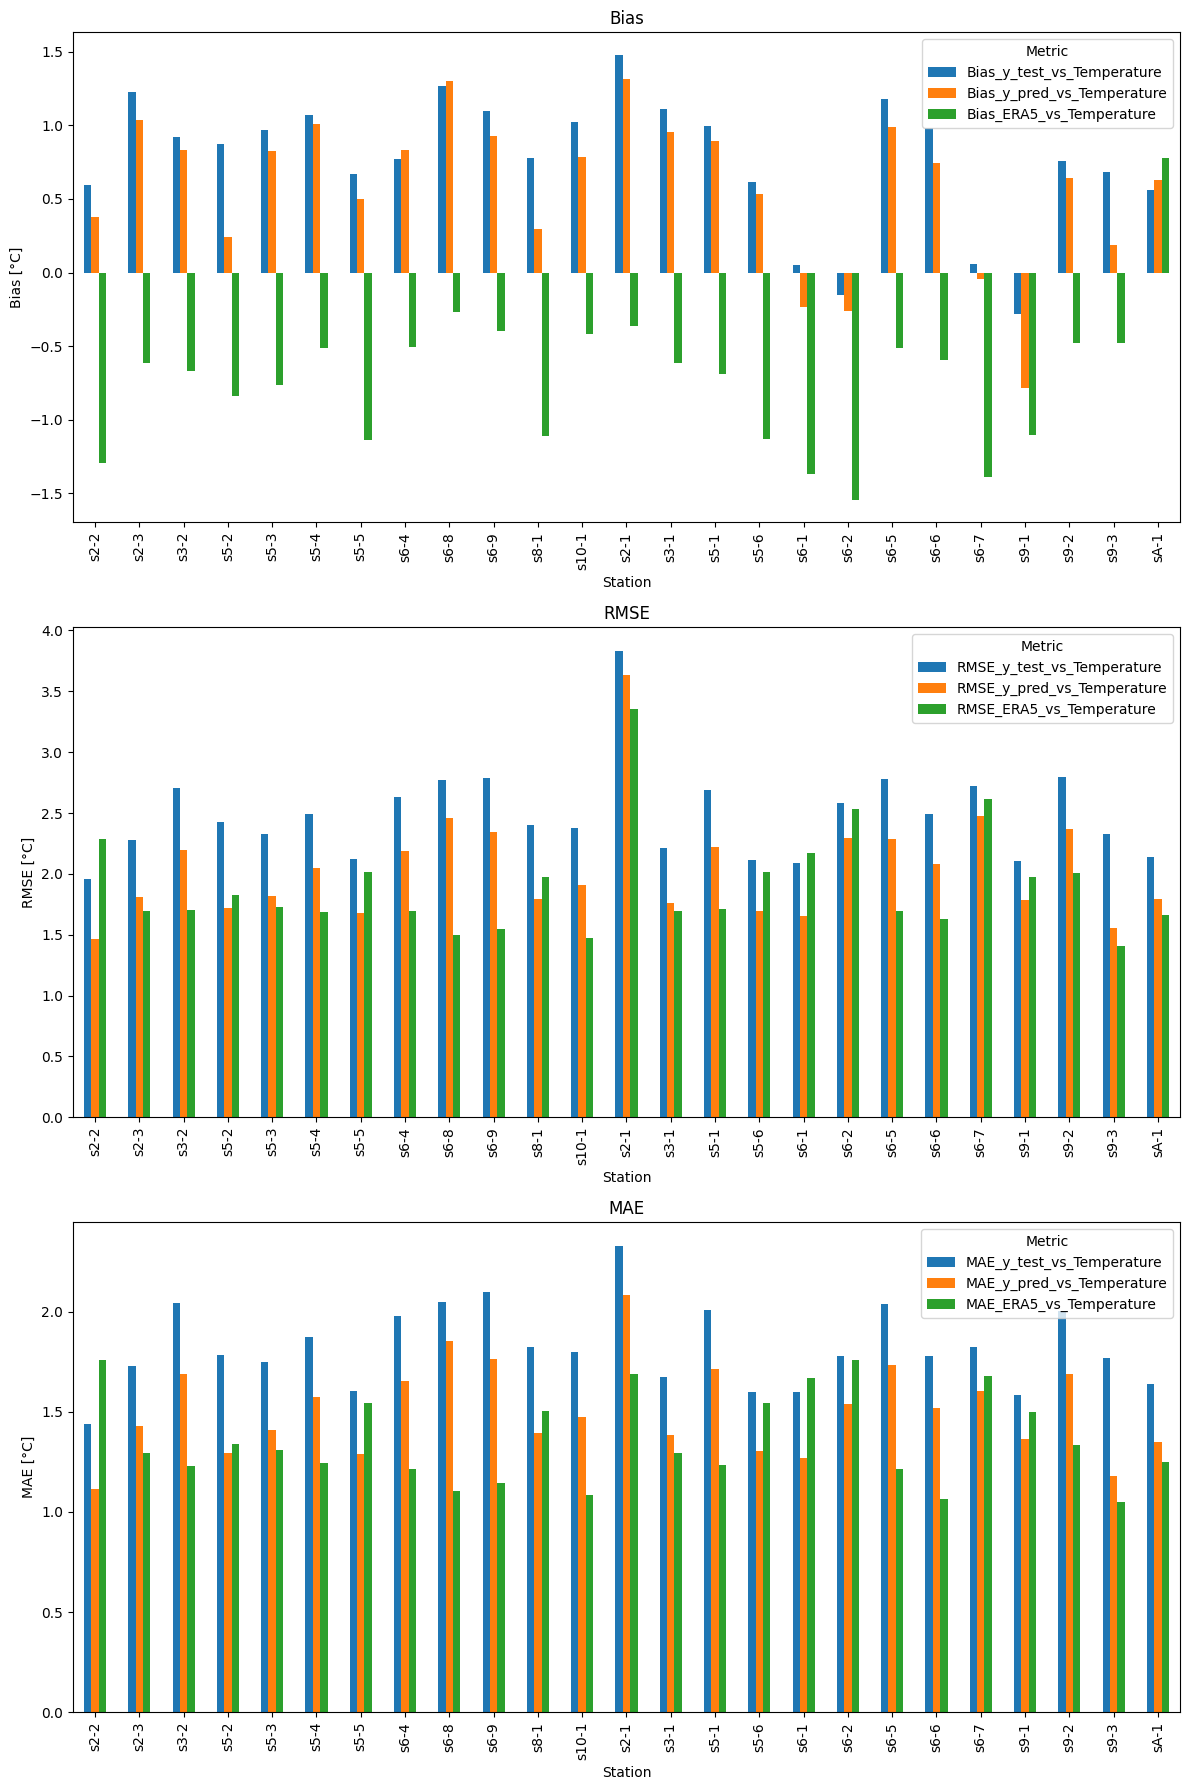

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
stations = test['Station'].unique()


# Initialize dictionaries to store metrics
rmse_dict = {}
mae_dict = {}
bias_dict = {}

for station in stations:
    station_data = test[test['Station'] == station]

    # Calculate Bias
    bias_y_pred_vs_y_test = np.mean(station_data['y_pred'] - station_data['y_test'])
    bias_y_test_vs_Temperature = np.mean(station_data['y_test'] - station_data['Temperature'])
    bias_y_pred_vs_Temperature = np.mean(station_data['y_pred'] - station_data['Temperature'])
    bias_ERA5_vs_Temperature = np.mean(station_data['ERA5'] - station_data['Temperature'])
    bias_dict[station] = [ bias_y_test_vs_Temperature, bias_y_pred_vs_Temperature, bias_ERA5_vs_Temperature]

    # Calculate RMSE
    rmse_y_pred_vs_y_test = np.sqrt(mean_squared_error(station_data['y_test'], station_data['y_pred']))
    rmse_y_test_vs_Temperature = np.sqrt(mean_squared_error(station_data['y_test'], station_data['Temperature']))
    rmse_y_pred_vs_Temperature = np.sqrt(mean_squared_error(station_data['y_pred'], station_data['Temperature']))
    rmse_ERA5_vs_Temperature = np.sqrt(mean_squared_error(station_data['ERA5'], station_data['Temperature']))
    rmse_dict[station] = [ rmse_y_test_vs_Temperature, rmse_y_pred_vs_Temperature, rmse_ERA5_vs_Temperature]

    # Calculate MAE
    mae_y_pred_vs_y_test = mean_absolute_error(station_data['y_test'], station_data['y_pred'])
    mae_y_test_vs_Temperature = mean_absolute_error(station_data['y_test'], station_data['Temperature'])
    mae_y_pred_vs_Temperature = mean_absolute_error(station_data['y_pred'], station_data['Temperature'])
    mae_ERA5_vs_Temperature = mean_absolute_error(station_data['ERA5'], station_data['Temperature'])
    mae_dict[station] = [ mae_y_test_vs_Temperature, mae_y_pred_vs_Temperature, mae_ERA5_vs_Temperature]

# Create DataFrame from dictionaries
bias_df = pd.DataFrame.from_dict(bias_dict, orient='index', columns=[ 'Bias_y_test_vs_Temperature', 'Bias_y_pred_vs_Temperature', 'Bias_ERA5_vs_Temperature'])
rmse_df = pd.DataFrame.from_dict(rmse_dict, orient='index', columns=[ 'RMSE_y_test_vs_Temperature', 'RMSE_y_pred_vs_Temperature', 'RMSE_ERA5_vs_Temperature'])
mae_df = pd.DataFrame.from_dict(mae_dict, orient='index', columns=[ 'MAE_y_test_vs_Temperature', 'MAE_y_pred_vs_Temperature', 'MAE_ERA5_vs_Temperature'])

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Bias
bias_df.plot(kind='bar', ax=axes[0])
axes[0].set_title('Bias')
axes[0].set_ylabel('Bias [°C]')
axes[0].set_xlabel('Station')
axes[0].legend(title='Metric', loc='upper right')

# RMSE
rmse_df.plot(kind='bar', ax=axes[1])
axes[1].set_title('RMSE')
axes[1].set_ylabel('RMSE [°C]')
axes[1].set_xlabel('Station')
axes[1].legend(title='Metric', loc='upper right')

# MAE
mae_df.plot(kind='bar', ax=axes[2])
axes[2].set_title('MAE')
axes[2].set_ylabel('MAE [°C]')
axes[2].set_xlabel('Station')
axes[2].legend(title='Metric', loc='upper right')

plt.tight_layout()
plt.show()

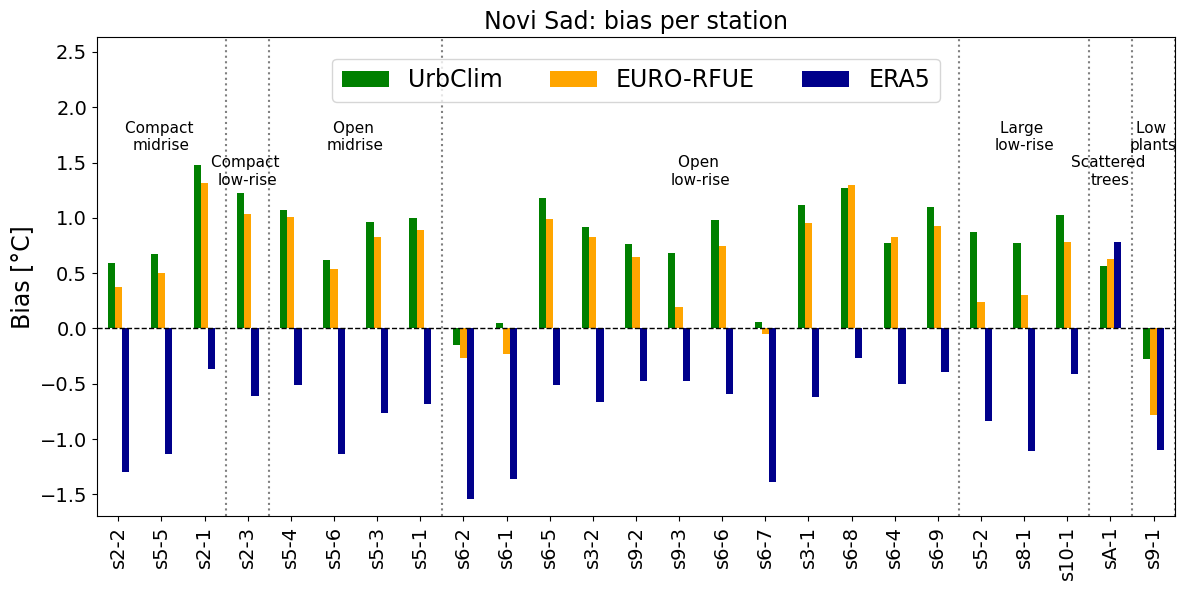

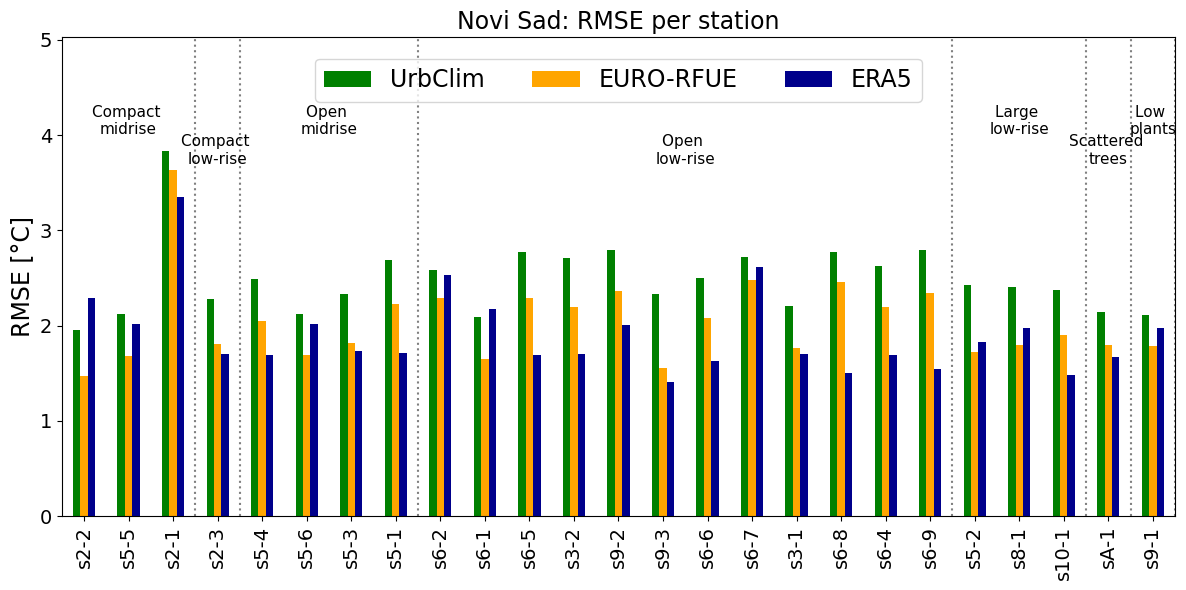

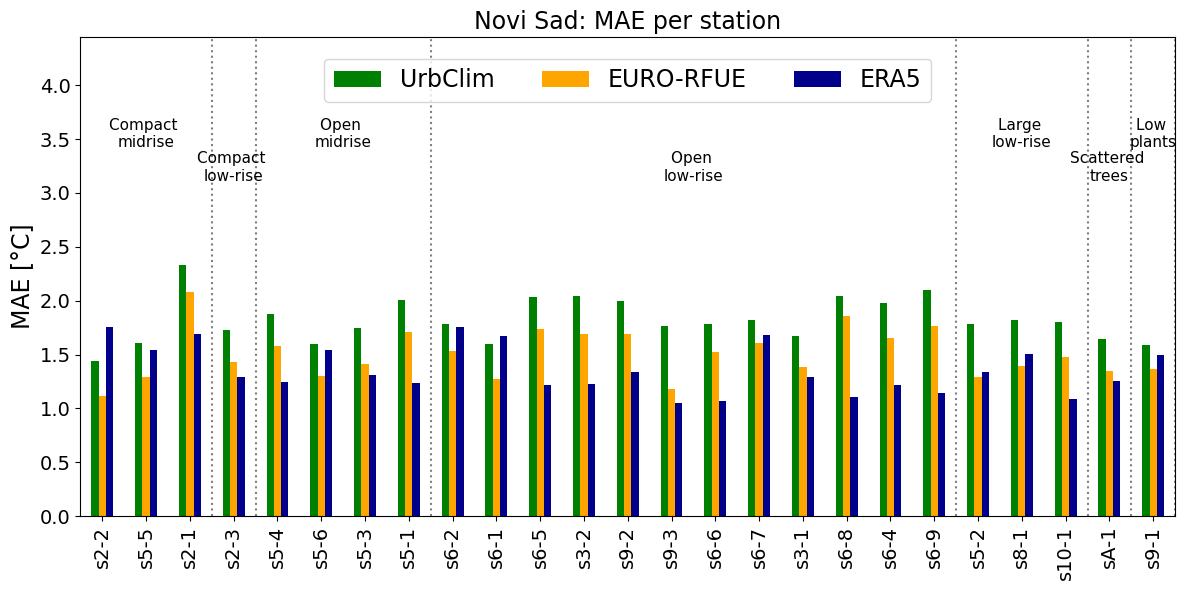

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming `test` DataFrame is defined elsewhere
# Sort the test DataFrame by the LCZ column
test_sorted = test.sort_values(by='LCZ')

# Get the unique stations in the sorted order
stations_sorted = test_sorted['Station'].unique()

# Initialize dictionaries to store metrics
rmse_dict = {}
mae_dict = {}
bias_dict = {}

for station in stations_sorted:
    station_data = test_sorted[test_sorted['Station'] == station]

    # Calculate Bias
    bias_y_pred_vs_y_test = np.mean(station_data['y_pred'] - station_data['y_test'])
    bias_y_test_vs_Temperature = np.mean(station_data['y_test'] - station_data['Temperature'])
    bias_y_pred_vs_Temperature = np.mean(station_data['y_pred'] - station_data['Temperature'])
    bias_ERA5_vs_Temperature = np.mean(station_data['ERA5'] - station_data['Temperature'])
    bias_dict[station] = [bias_y_test_vs_Temperature, bias_y_pred_vs_Temperature, bias_ERA5_vs_Temperature]

    # Calculate RMSE
    rmse_y_pred_vs_y_test = np.sqrt(mean_squared_error(station_data['y_test'], station_data['y_pred']))
    rmse_y_test_vs_Temperature = np.sqrt(mean_squared_error(station_data['y_test'], station_data['Temperature']))
    rmse_y_pred_vs_Temperature = np.sqrt(mean_squared_error(station_data['y_pred'], station_data['Temperature']))
    rmse_ERA5_vs_Temperature = np.sqrt(mean_squared_error(station_data['ERA5'], station_data['Temperature']))
    rmse_dict[station] = [rmse_y_test_vs_Temperature, rmse_y_pred_vs_Temperature, rmse_ERA5_vs_Temperature]

    # Calculate MAE
    mae_y_pred_vs_y_test = mean_absolute_error(station_data['y_test'], station_data['y_pred'])
    mae_y_test_vs_Temperature = mean_absolute_error(station_data['y_test'], station_data['Temperature'])
    mae_y_pred_vs_Temperature = mean_absolute_error(station_data['y_pred'], station_data['Temperature'])
    mae_ERA5_vs_Temperature = mean_absolute_error(station_data['ERA5'], station_data['Temperature'])
    mae_dict[station] = [mae_y_test_vs_Temperature, mae_y_pred_vs_Temperature, mae_ERA5_vs_Temperature]

# Create DataFrame from dictionaries
bias_df = pd.DataFrame.from_dict(bias_dict, orient='index', columns=['Bias_y_test_vs_Temperature', 'Bias_y_pred_vs_Temperature', 'Bias_ERA5_vs_Temperature'])
rmse_df = pd.DataFrame.from_dict(rmse_dict, orient='index', columns=['RMSE_y_test_vs_Temperature', 'RMSE_y_pred_vs_Temperature', 'RMSE_ERA5_vs_Temperature'])
mae_df = pd.DataFrame.from_dict(mae_dict, orient='index', columns=['MAE_y_test_vs_Temperature', 'MAE_y_pred_vs_Temperature', 'MAE_ERA5_vs_Temperature'])

# Reorder the DataFrames according to sorted stations
bias_df = bias_df.loc[stations_sorted]
rmse_df = rmse_df.loc[stations_sorted]
mae_df = mae_df.loc[stations_sorted]

# Function to add vertical lines and labels for LCZ groups
def add_lcz_lines_and_labels(ax, test_sorted, stations_sorted):
    lczs_sorted = test_sorted['LCZ'].unique()
    lcz_labels = {
        1: 'Compact \nhigh-rise',
        2: 'Compact \nmidrise',
        3: 'Compact \nlow-rise',
        4: 'Open \nhigh-rise',
        5: 'Open \nmidrise',
        6: 'Open \nlow-rise',
        7: 'Lightweight \nlow-rise',
        8: 'Large \nlow-rise',
        9: 'Sparsely \nbuilt',
        10: 'Heavy \nindustry',
        11: 'Dense \ntrees',
        12: 'Scattered \ntrees',
        13: 'Bush, scrub',
        14: 'Low \nplants',
        15: 'Bare rock \nor paved',
        16: 'Bare soil \nor sand',
        17: 'Water'
    }
    x_ticks = ax.get_xticks()
    for i, lcz in enumerate(lczs_sorted):
        group = test_sorted[test_sorted['LCZ'] == lcz]['Station'].unique()
        cumulative_position = sum(test_sorted[test_sorted['LCZ'] == lczs_sorted[j]]['Station'].unique().size for j in range(i + 1)) - 1

        if i % 2 == 0:
           legendpos = 1.05
        else:
           legendpos = 1.36

        if cumulative_position + 0.5 < len(x_ticks):
            ax.axvline(x=cumulative_position + 0.5, color='gray', linestyle='dotted')
            ax.text((cumulative_position - len(group) / 2) + 0.5, max(ax.get_ylim()) - legendpos, lcz_labels[lcz], ha='center', va='bottom', fontsize=11, color='black', rotation=0)
colors = ['green', 'orange', 'darkblue']
# Plotting Bias
fig, ax_bias = plt.subplots(figsize=(12, 6))
bias_df.plot(kind='bar', ax=ax_bias, color=colors)
ax_bias.set_title('Novi Sad: bias per station', fontsize=17)
ax_bias.set_ylabel('Bias [°C]', fontsize=17)
ax_bias.legend(labels=['UrbClim', 'EURO-RFUE', 'ERA5'], loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=3, fontsize=17)
ax_bias.axhline(y=0, color='k', linestyle='--', linewidth=1)
ax_bias.tick_params(axis='both', which='major', labelsize=14)
ylim_bias = ax_bias.get_ylim()
ax_bias.set_ylim(ylim_bias[0], ylim_bias[1] + 1)
add_lcz_lines_and_labels(ax_bias, test_sorted, stations_sorted)
plt.tight_layout()
plt.show()

# Plotting RMSE
fig, ax_rmse = plt.subplots(figsize=(12, 6))
rmse_df.plot(kind='bar', ax=ax_rmse, color=colors)
ax_rmse.set_title('Novi Sad: RMSE per station', fontsize=17)
ax_rmse.set_ylabel('RMSE [°C]', fontsize=17)
ax_rmse.legend(labels=['UrbClim', 'EURO-RFUE', 'ERA5'], loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=3, fontsize=17)
ylim_rmse = ax_rmse.get_ylim()
ax_rmse.set_ylim(ylim_rmse[0], ylim_rmse[1] + 1)
ax_rmse.tick_params(axis='both', which='major', labelsize=14)
add_lcz_lines_and_labels(ax_rmse, test_sorted, stations_sorted)
plt.tight_layout()
plt.show()

# Plotting MAE
fig, ax_mae = plt.subplots(figsize=(12, 6))
mae_df.plot(kind='bar', ax=ax_mae, color=colors)
ax_mae.set_title('Novi Sad: MAE per station', fontsize=17)
ax_mae.set_ylabel('MAE [°C]', fontsize=17)
ax_mae.legend(labels=['UrbClim', 'EURO-RFUE', 'ERA5'], loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=3, fontsize=17)
ylim_mae = ax_mae.get_ylim()
ax_mae.set_ylim(ylim_mae[0], ylim_mae[1] + 2)
ax_mae.tick_params(axis='both', which='major', labelsize=14)
add_lcz_lines_and_labels(ax_mae, test_sorted, stations_sorted)
plt.tight_layout()
plt.show()


<ipython-input-65-a011930a7154>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Hour'] = filtered_data['DateTime'].dt.hour
<ipython-input-65-a011930a7154>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Hour'] = data_filtered['DateTime'].dt.hour


Hour: 0
13032    -21.172732
30000    -21.172732
46968    -21.172732
63936    -21.175839
80904    -21.167539
97872    -21.175839
114840   -21.167539
131808   -21.152076
148776   -21.152076
165744   -21.175878
182712   -21.152076
208421   -21.172732
225389   -21.172732
242357   -21.172732
259325   -21.175839
276293   -21.167539
307913   -21.175878
332907   -21.175878
349875   -21.175878
379875   -21.152076
379876   -21.140439
400779   -21.140439
417747   -21.140439
Name: SOLAR_ELEV, dtype: float64
Hour: 1
13033    -16.665618
30001    -16.665618
46969    -16.665618
63937    -16.666063
80905    -16.662222
97873    -16.666063
114841   -16.662222
131809   -16.647527
148777   -16.647527
165745   -16.668065
182713   -16.647527
208422   -16.665618
225390   -16.665618
242358   -16.665618
259326   -16.666063
276294   -16.662222
307914   -16.668065
332908   -16.668065
349876   -16.668065
379877   -16.647527
379878   -16.630313
400780   -16.630313
417748   -16.630313
Name: SOLAR_ELEV, dtype: float6

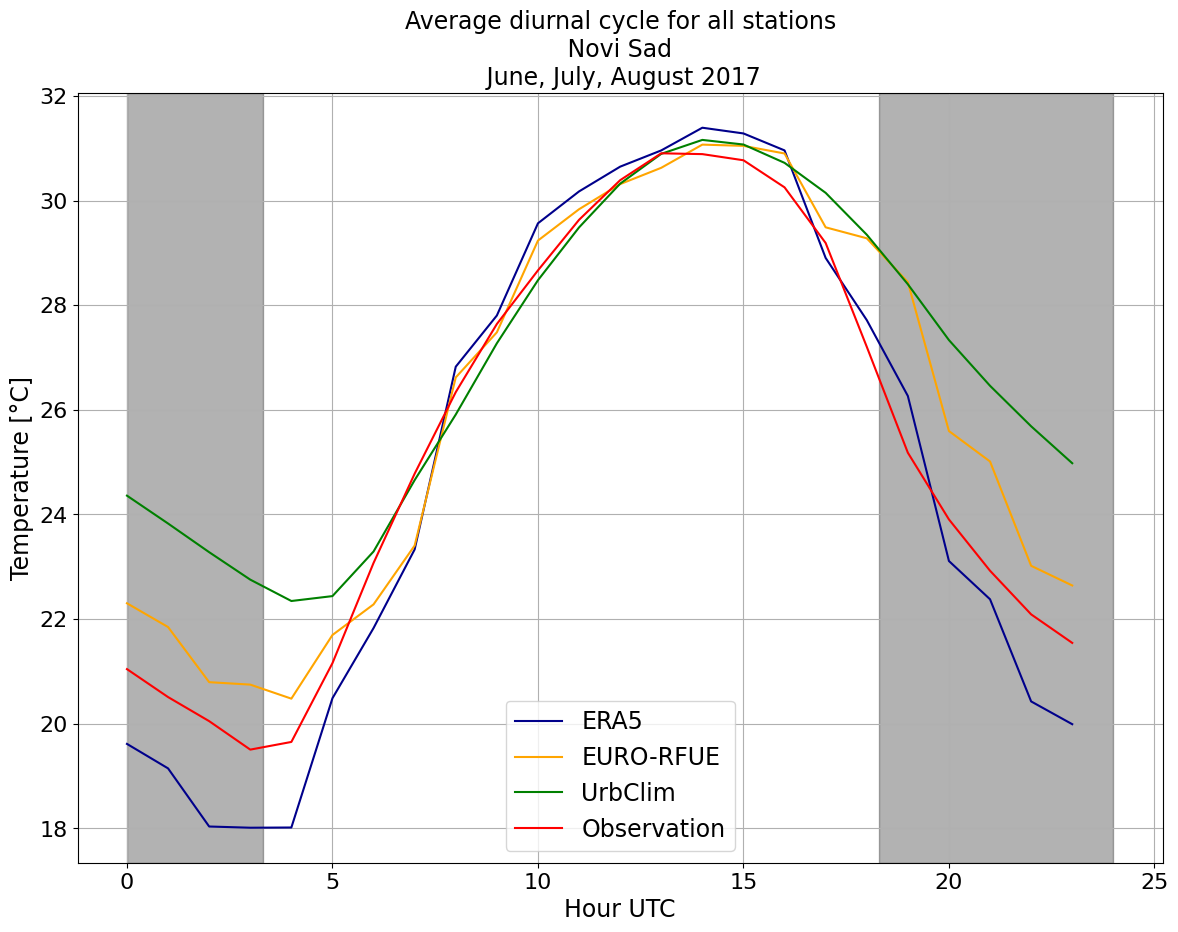

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `test` is your DataFrame
# Convert DateTime column to datetime type
test['DateTime'] = pd.to_datetime(test['DateTime'])

# Filter data for the months July, August, September and year 2017
data_filtered = test[(test['DateTime'].dt.year == 2017) &
                     (test['DateTime'].dt.month.isin([6, 7, 8]))]

# Filter data for the 15th of July, 2017
filtered_data = test[(test['DateTime'].dt.year == 2017) &
                     (test['DateTime'].dt.month == 7) &
                     (test['DateTime'].dt.day == 15)]

# Extract the hour from the DateTime for grouping
filtered_data['Hour'] = filtered_data['DateTime'].dt.hour

# Group by hour and print the SOLAR_ELEV values
for hour, group in filtered_data.groupby('Hour'):
    print(f"Hour: {hour}")
    print(group['SOLAR_ELEV'])

# Extract hour of the day for grouping
data_filtered['Hour'] = data_filtered['DateTime'].dt.hour

# Select only numeric columns and the grouping columns
numeric_columns = ['T2M', 'y_pred', 'y_test', 'Temperature']
grouping_columns = ['Hour']

# Group data by Hour and calculate the mean for numeric columns
grouped = data_filtered[grouping_columns + numeric_columns].groupby(['Hour']).mean().reset_index()

# Plotting the average diurnal cycle for all stations
plt.figure(figsize=(14, 10))

colors = ['darkblue', 'orange', 'green', 'red']
linestyles = ['-', '-', '-', '-']

for i, var in enumerate(numeric_columns):
    plt.plot(grouped['Hour'], grouped[var], label=var, color=colors[i], linestyle=linestyles[i])

plt.title('Average diurnal cycle for all stations\n Novi Sad \n June, July, August 2017', fontsize=17)
plt.xlabel('Hour UTC', fontsize=17)
plt.ylabel('Temperature [°C]', fontsize=17)

# Define nighttime shading
start_night = 18.3  # 20:00
end_night = 3.3  # 04:00

plt.axvspan(start_night, 24, color='k', alpha=0.3)  # Night starts at 20:00
plt.axvspan(0, end_night, color='k', alpha=0.3)  # Night ends at 04:00
plt.tick_params(axis='both', which='major', labelsize=16)

plt.legend(labels=['ERA5', 'EURO-RFUE', 'UrbClim' ,'Observation' ], fontsize=17)
plt.grid(True)
plt.show()


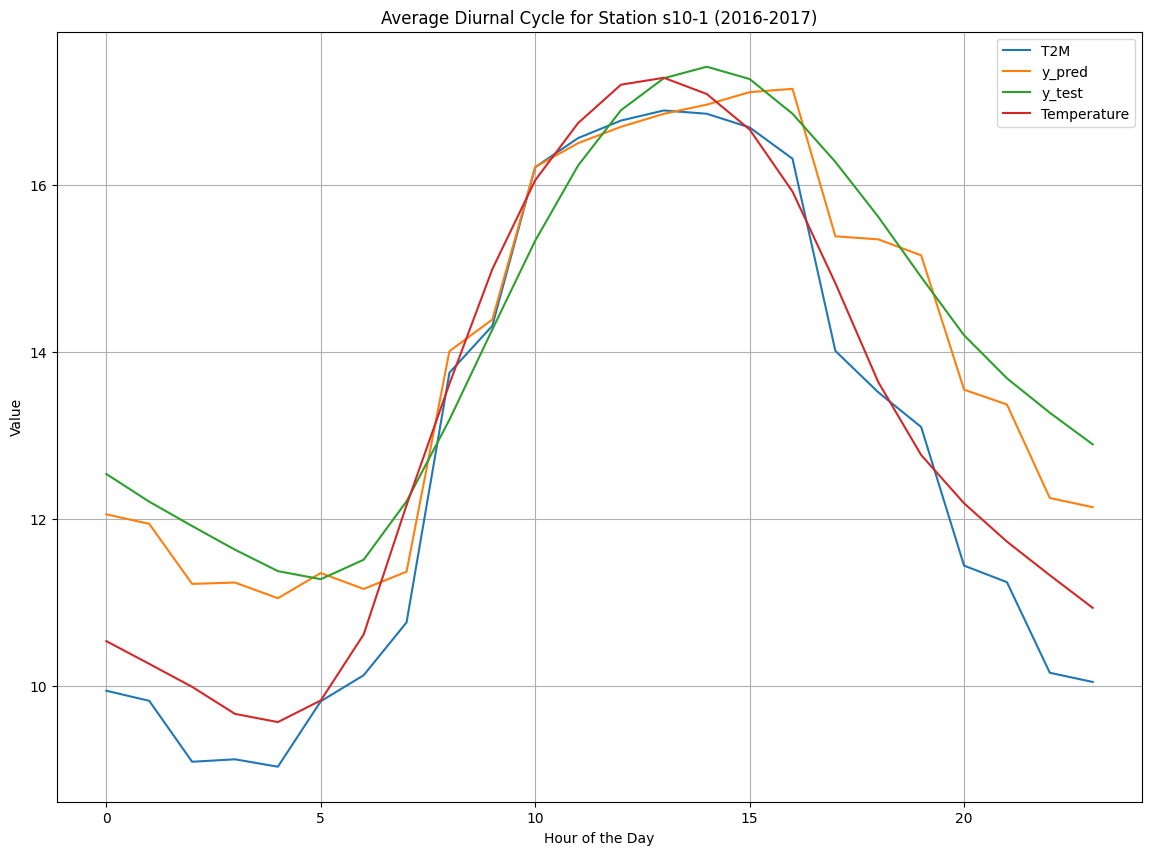

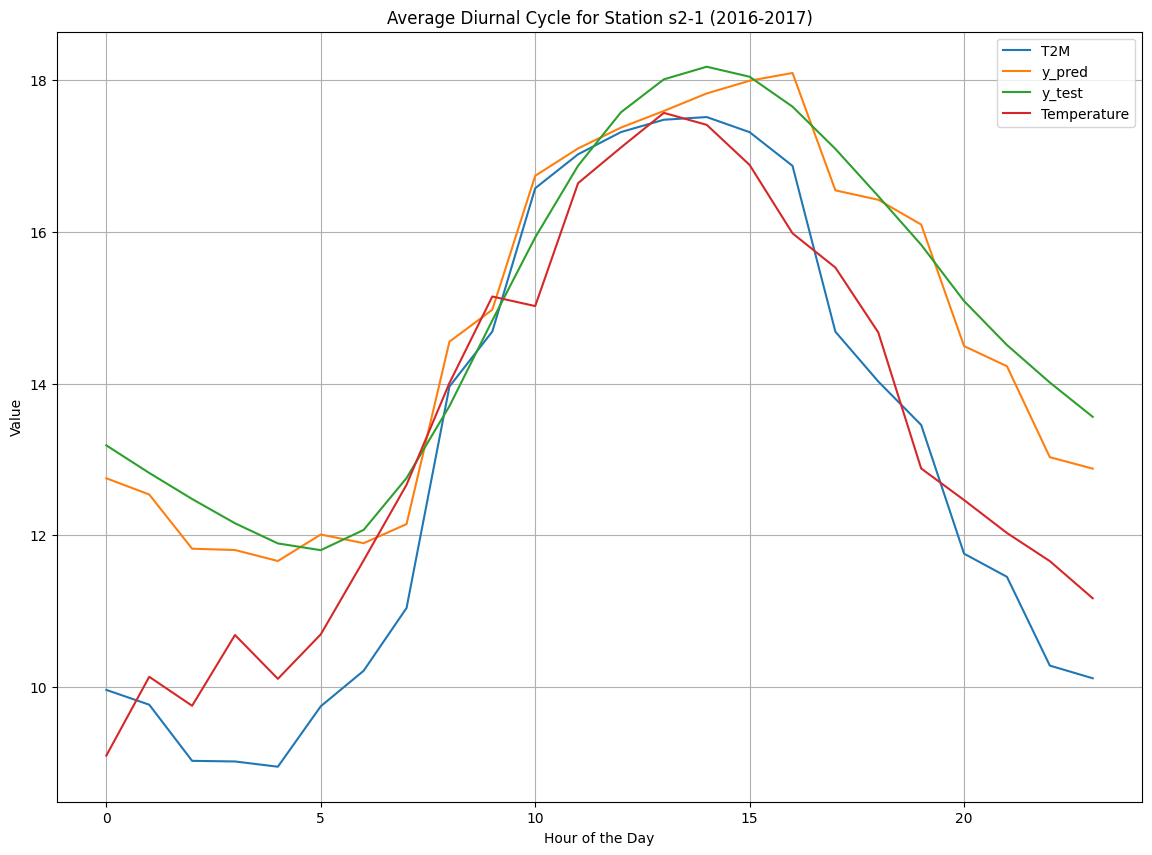

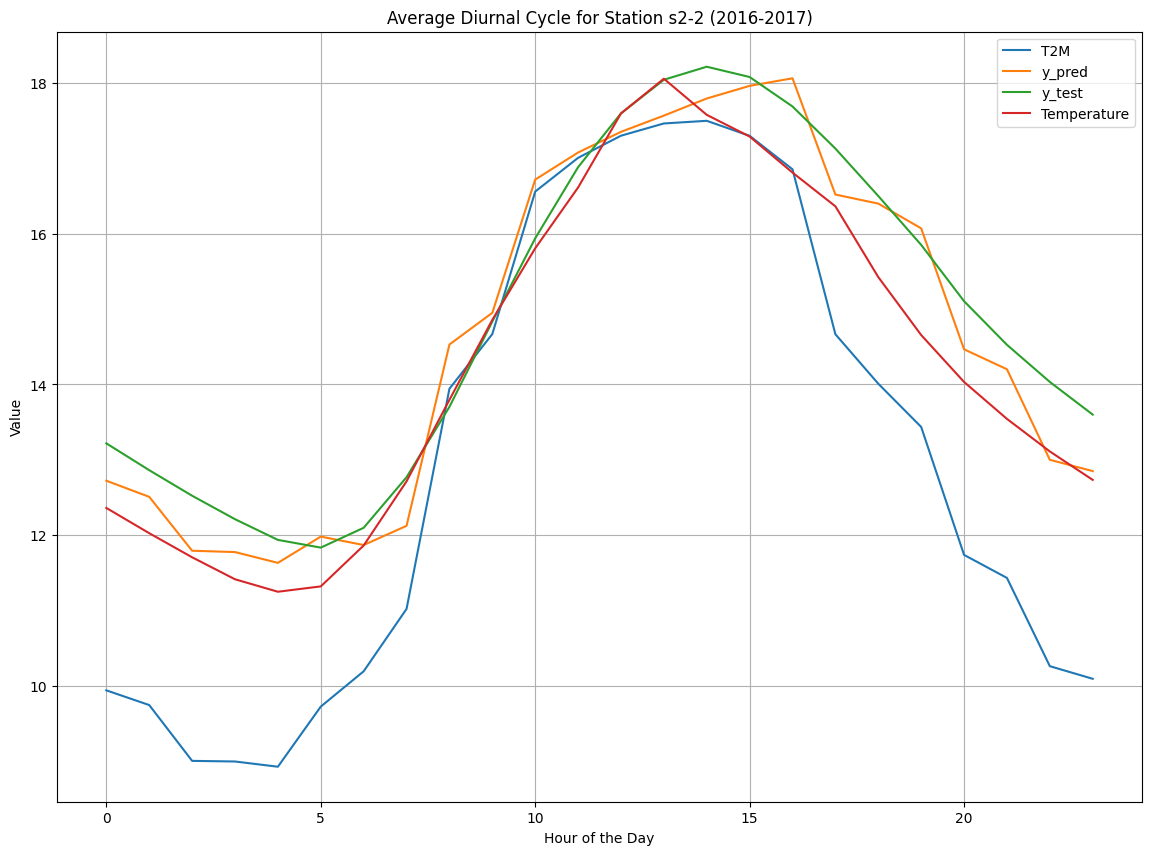

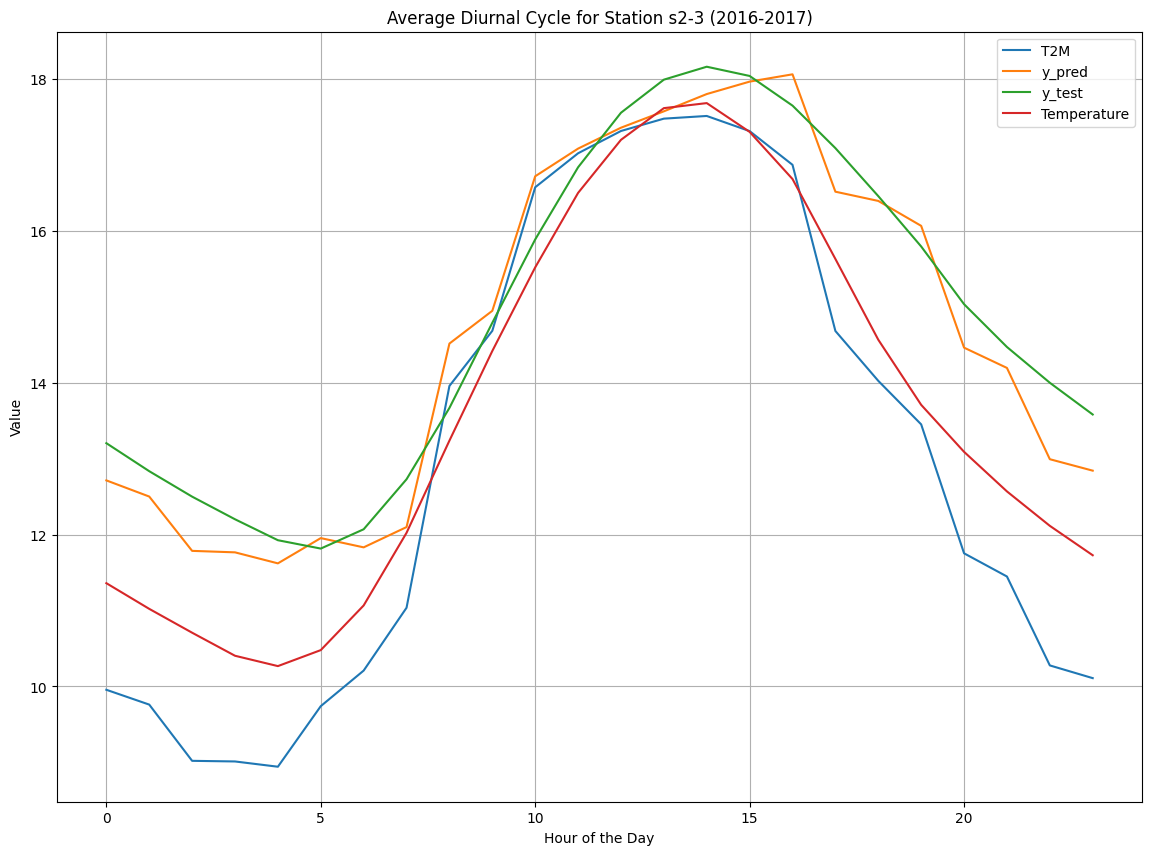

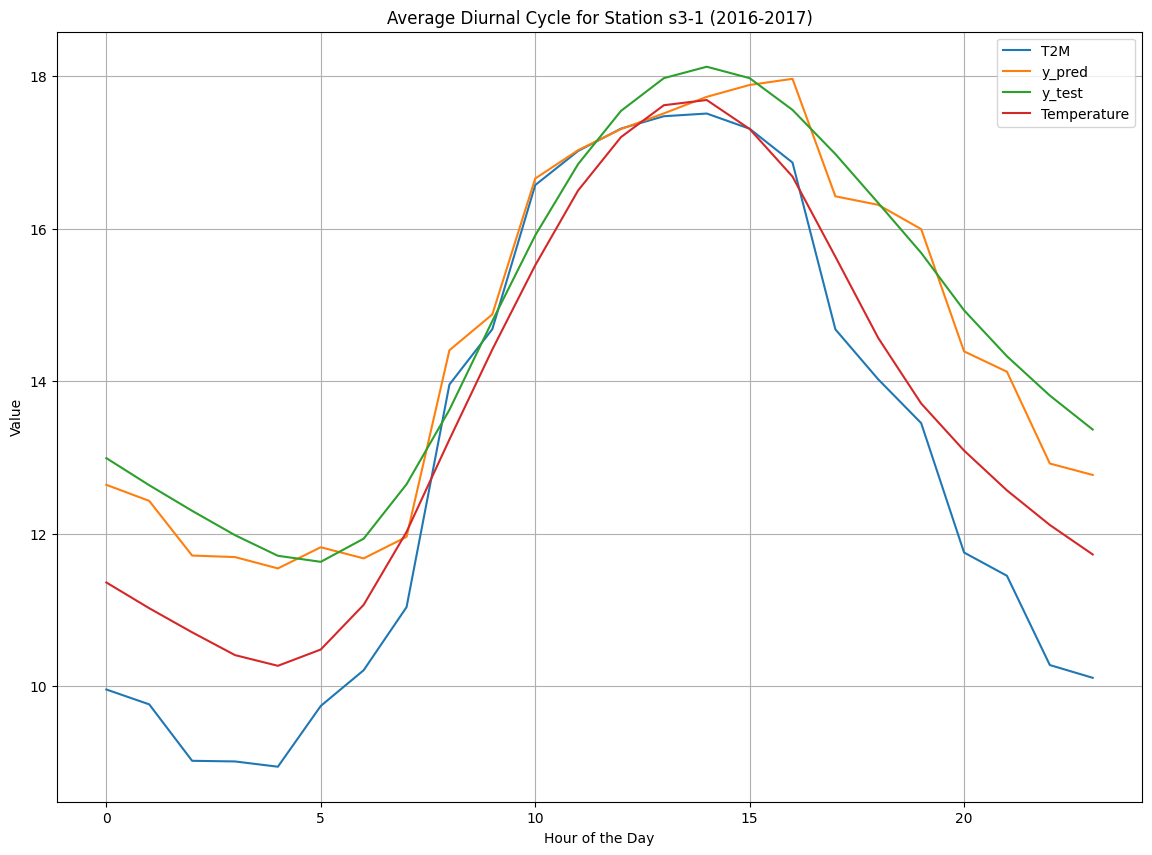

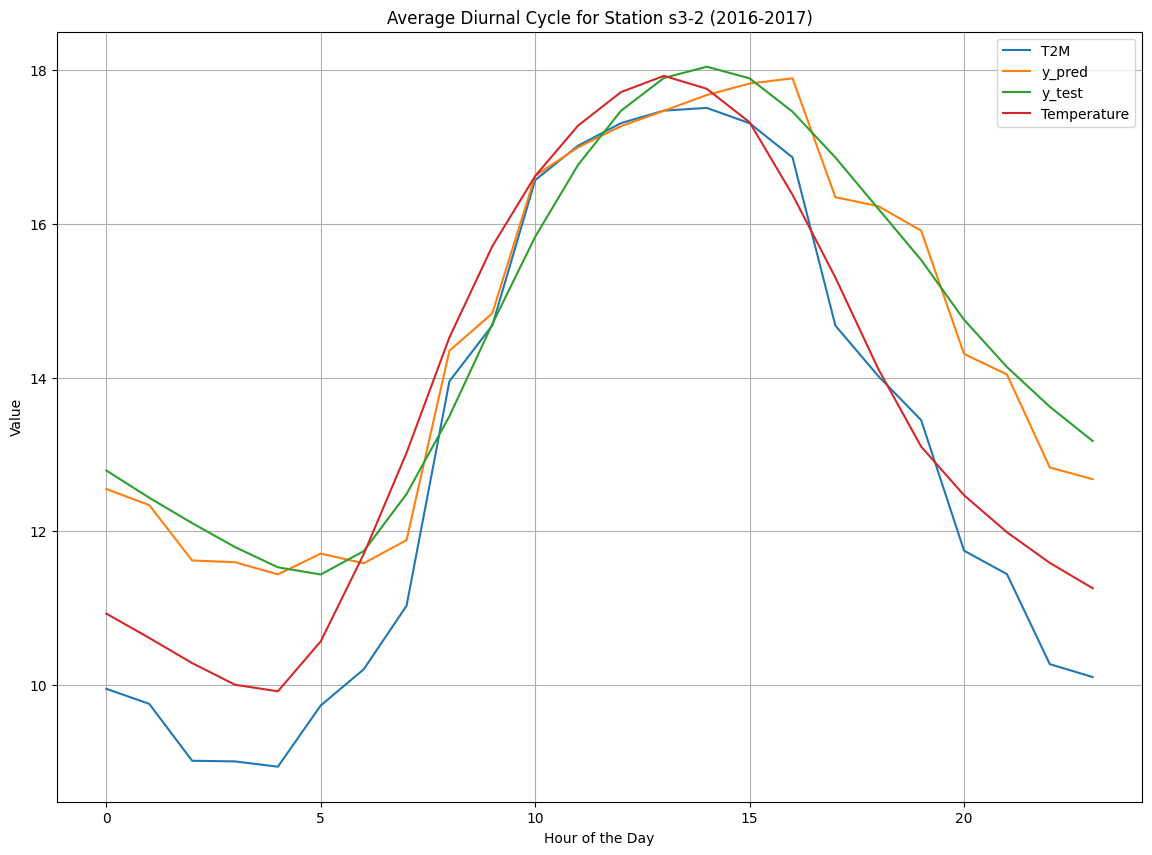

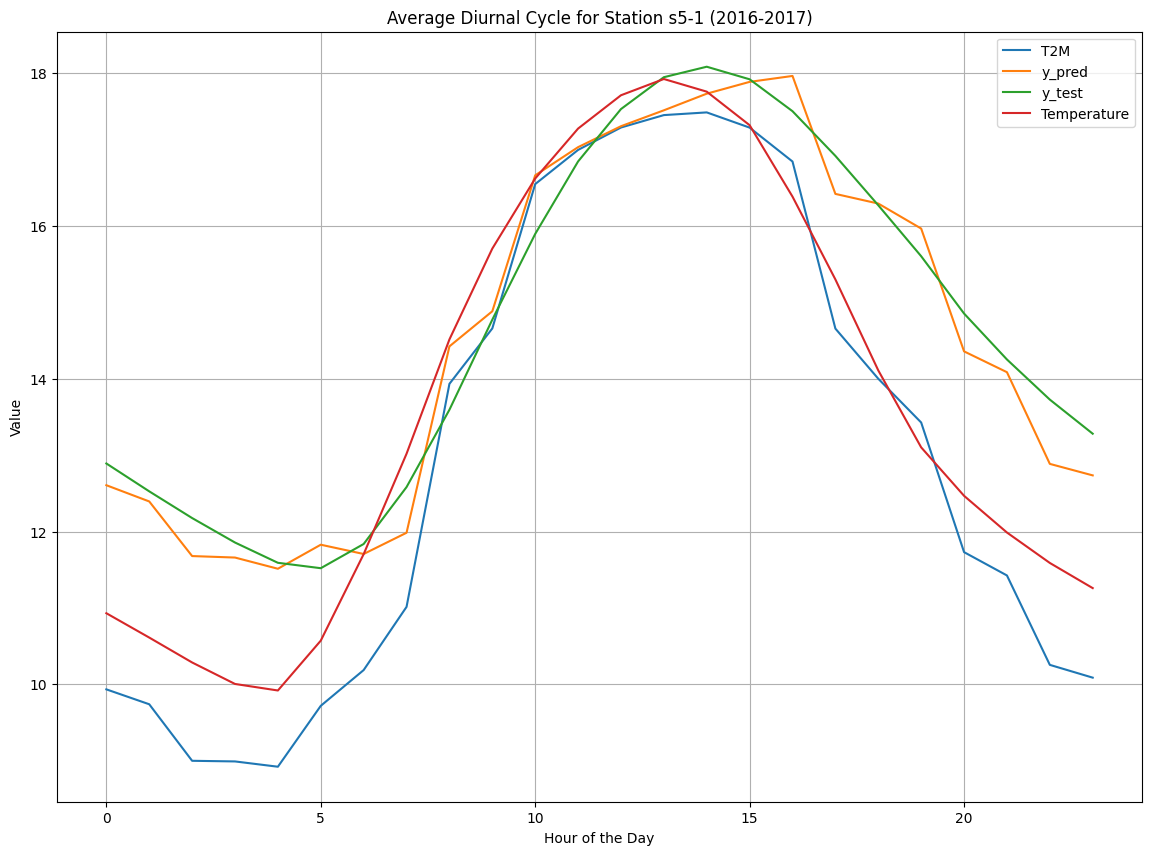

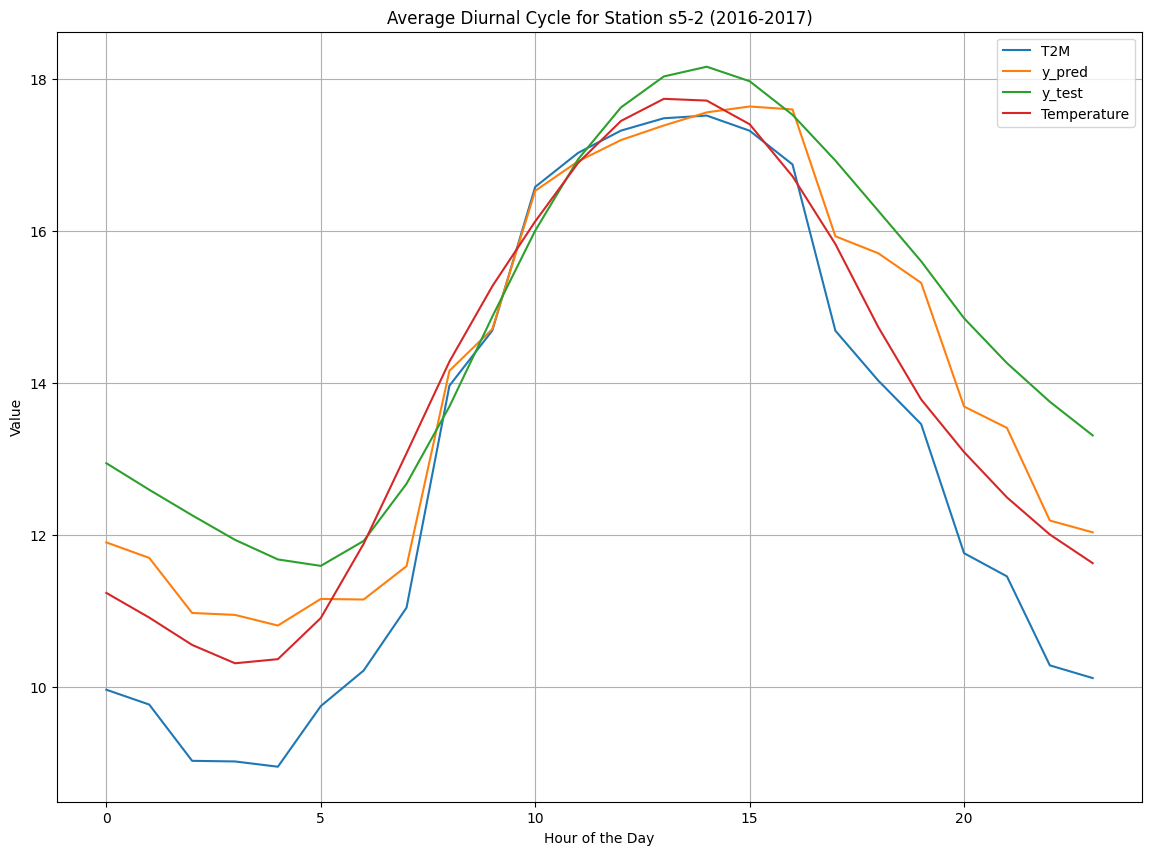

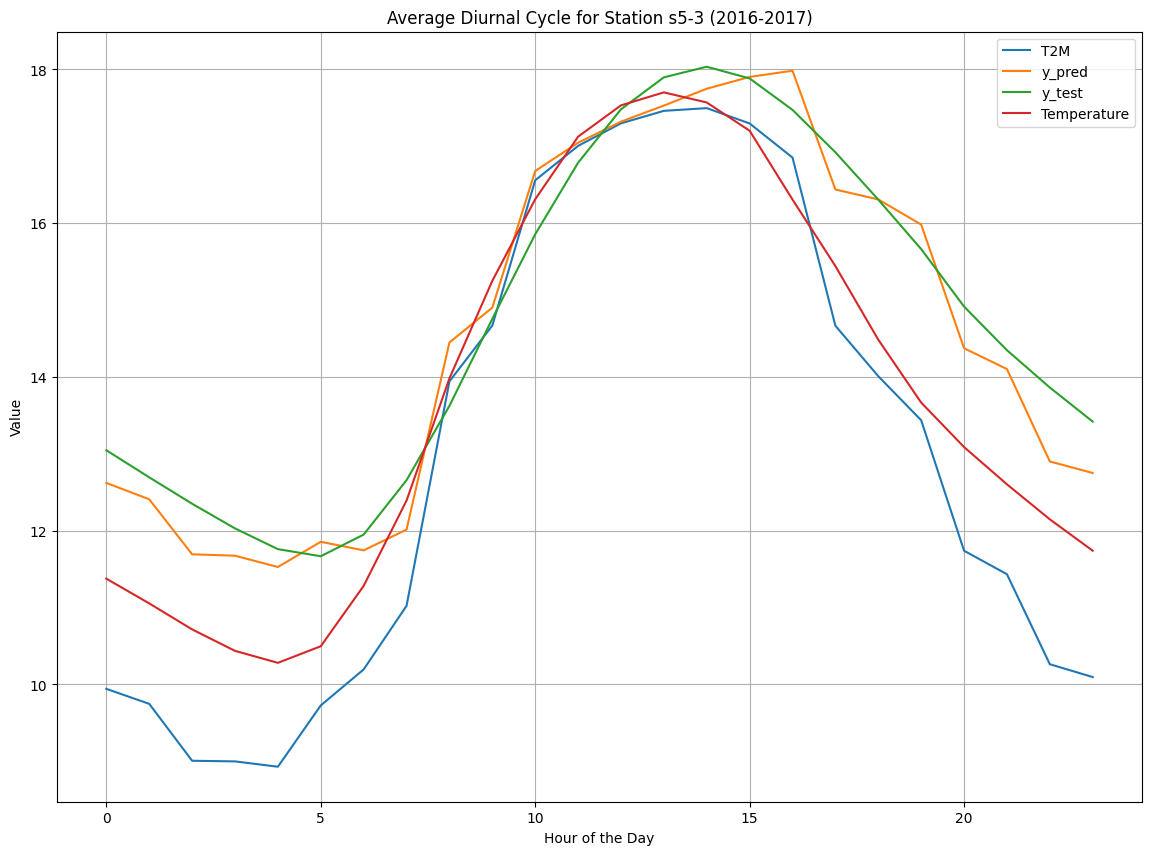

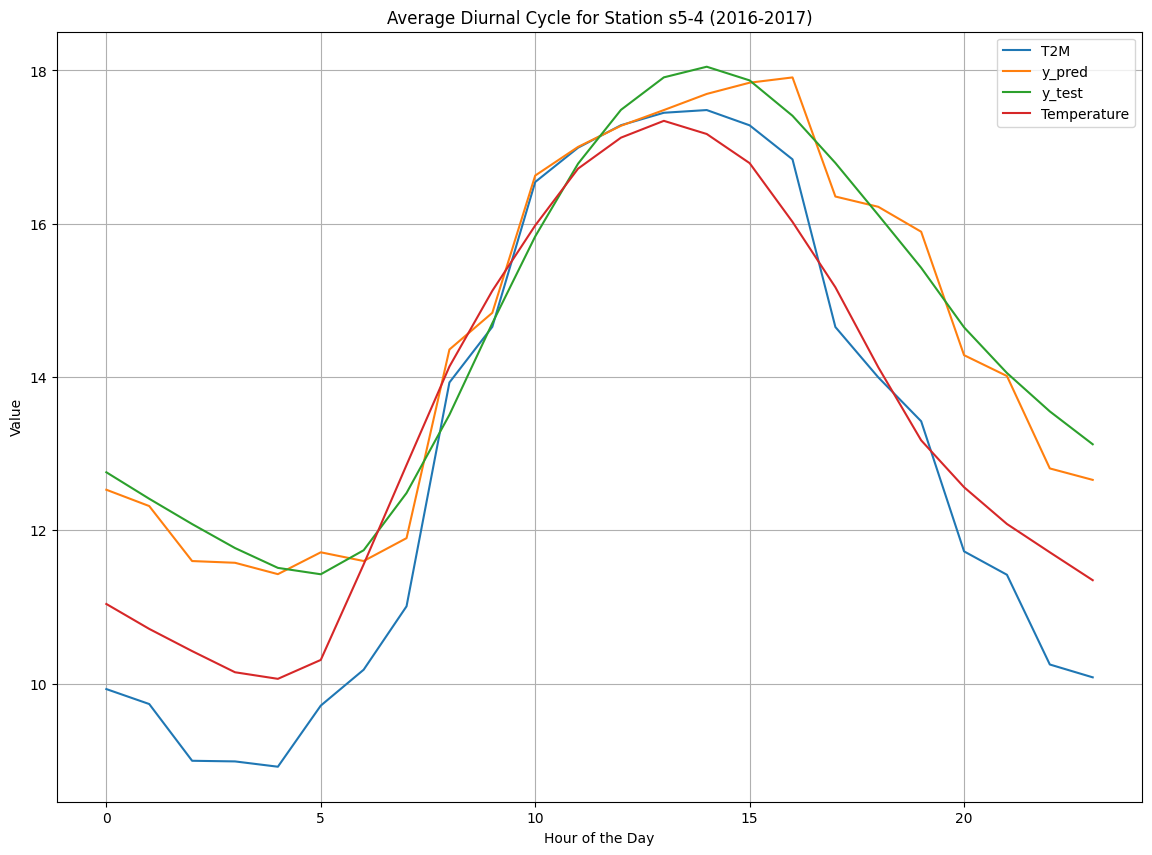

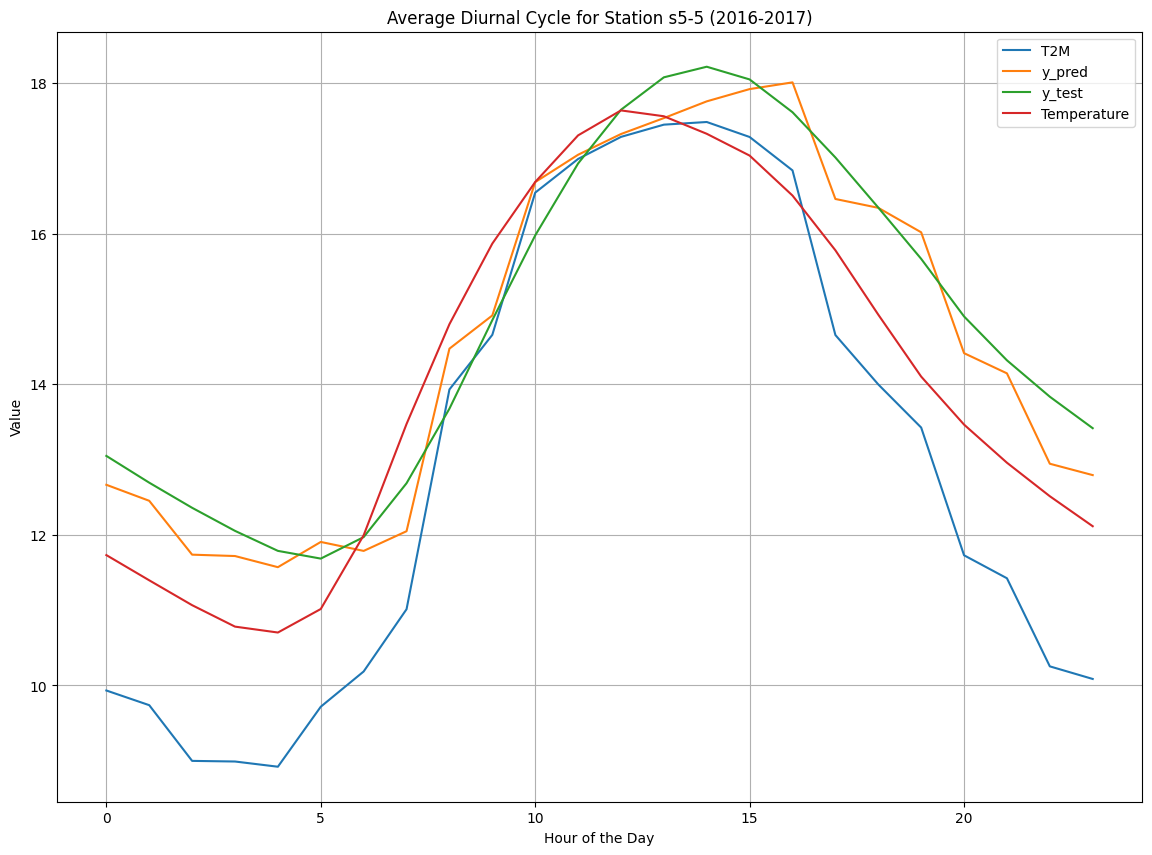

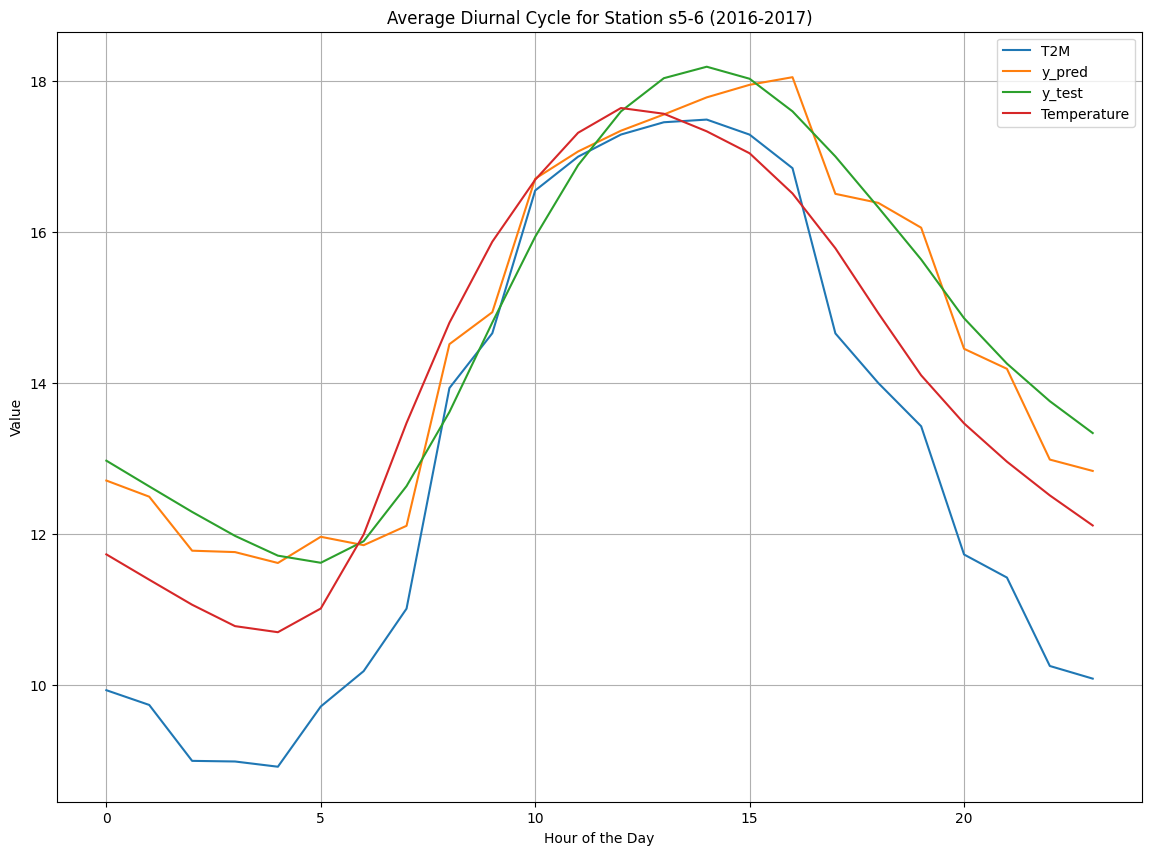

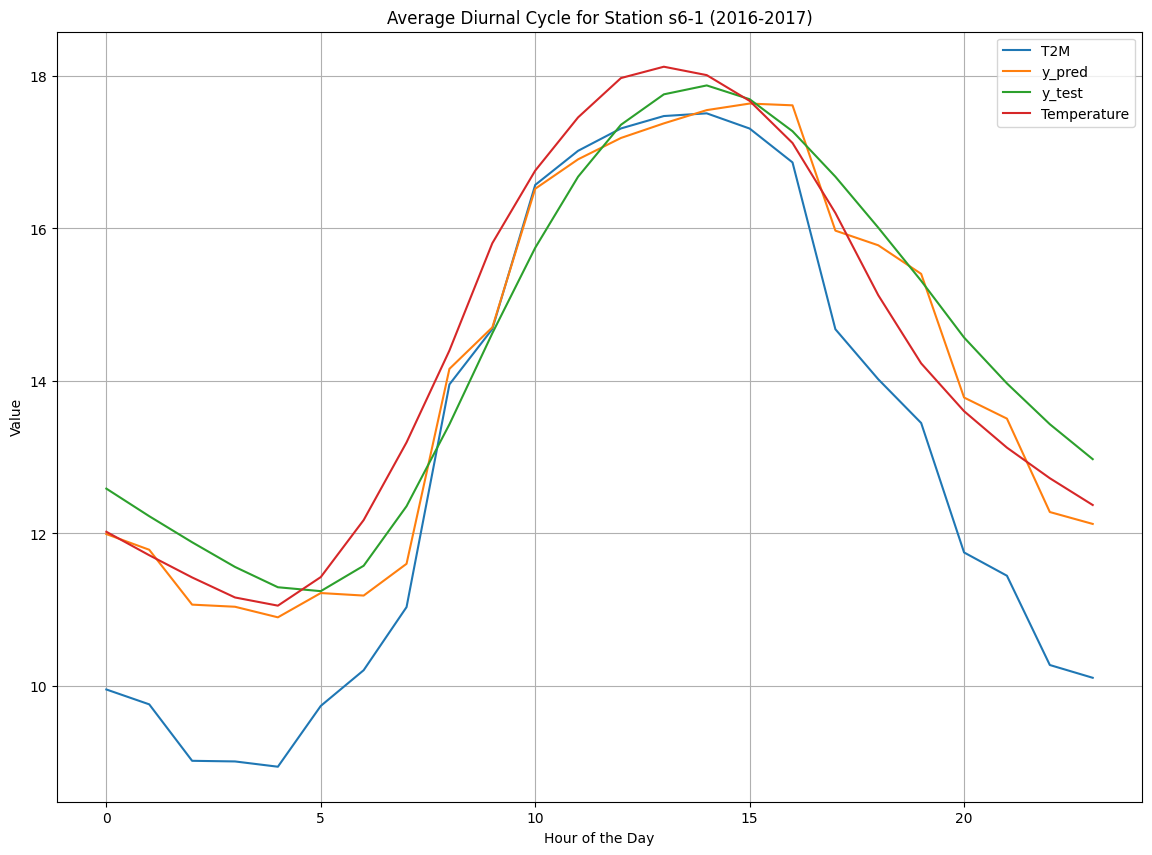

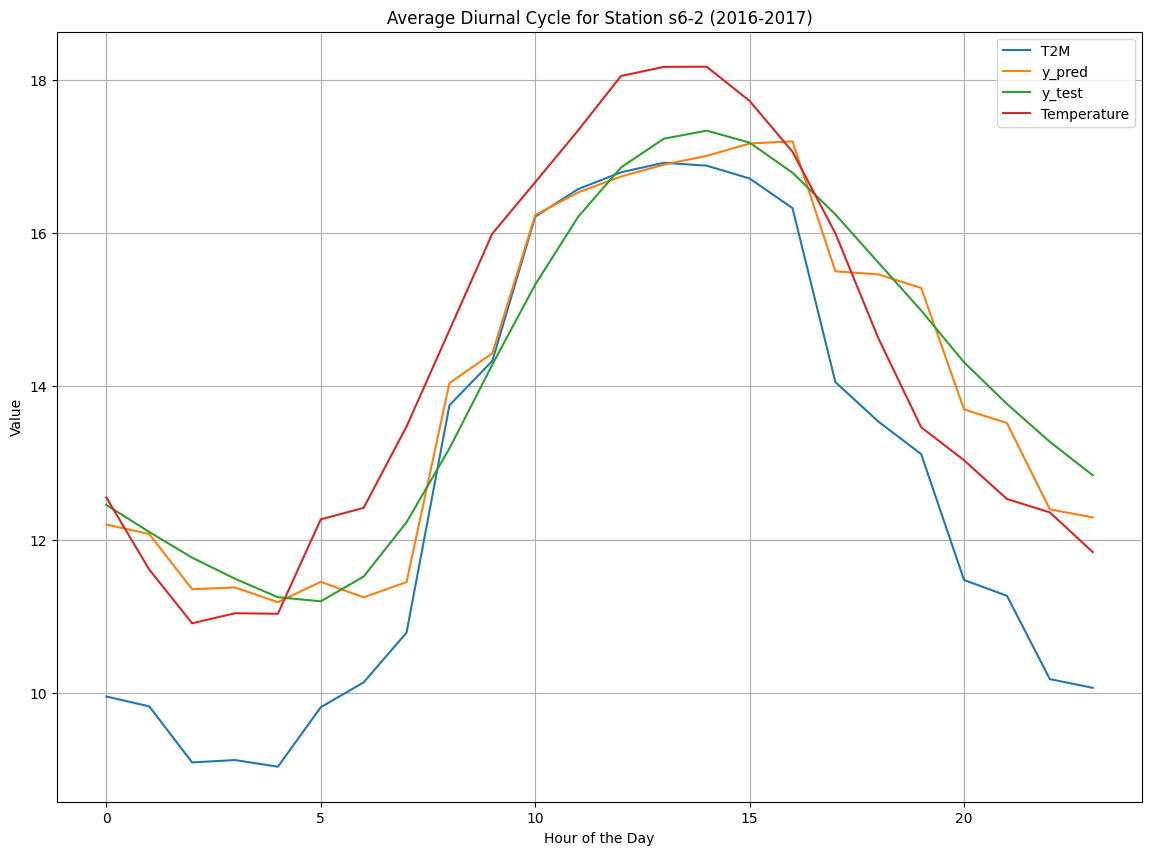

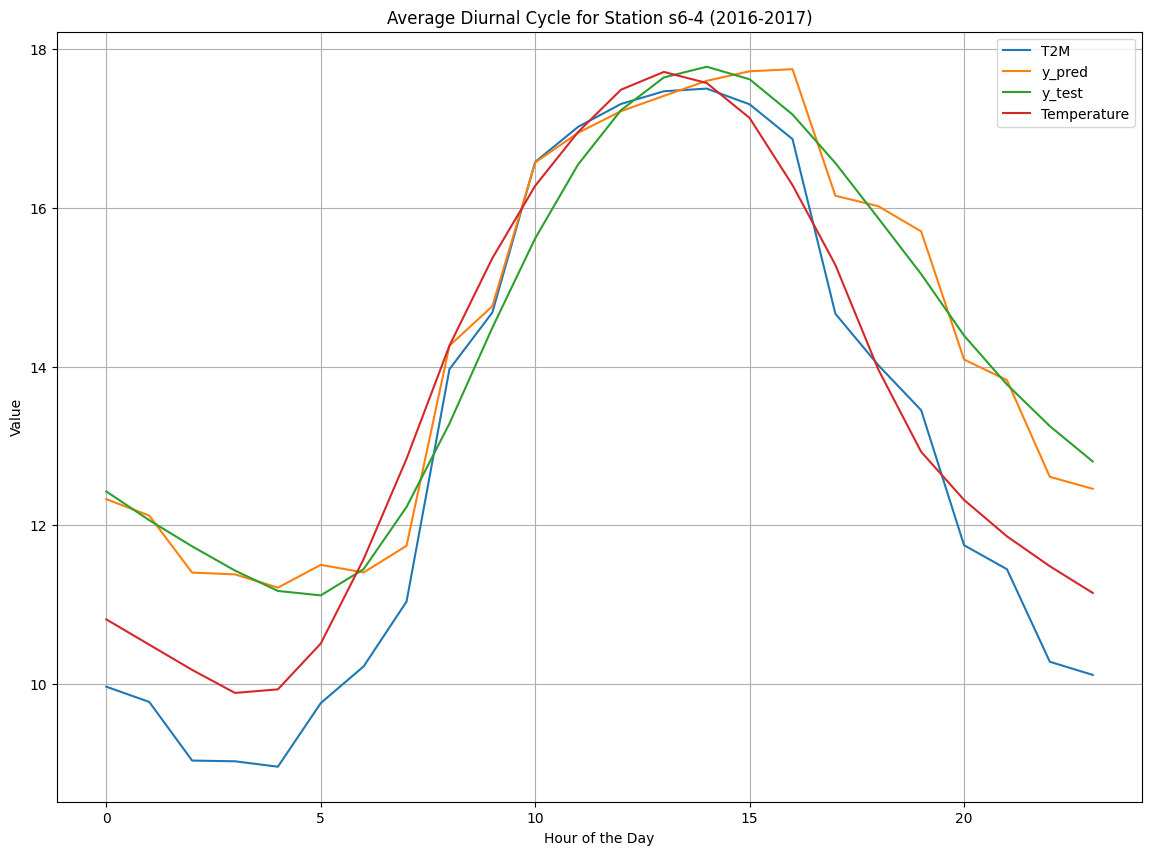

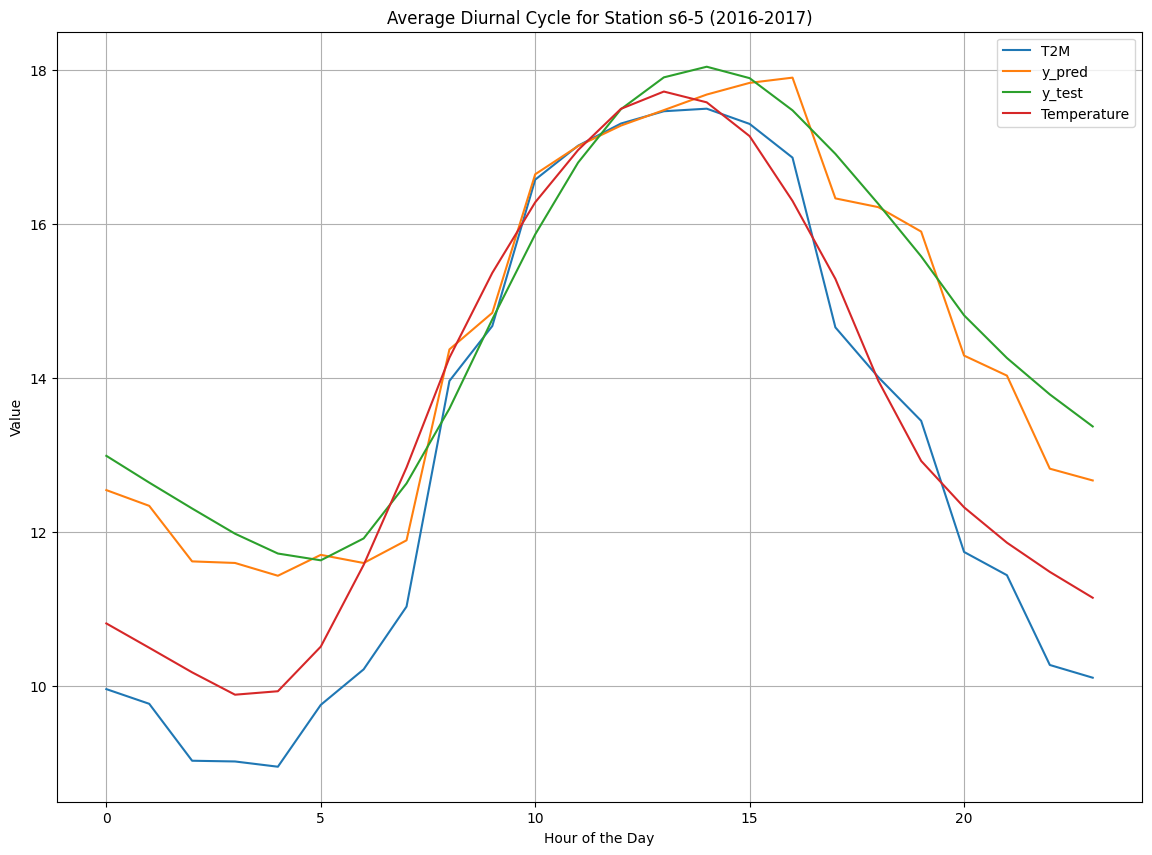

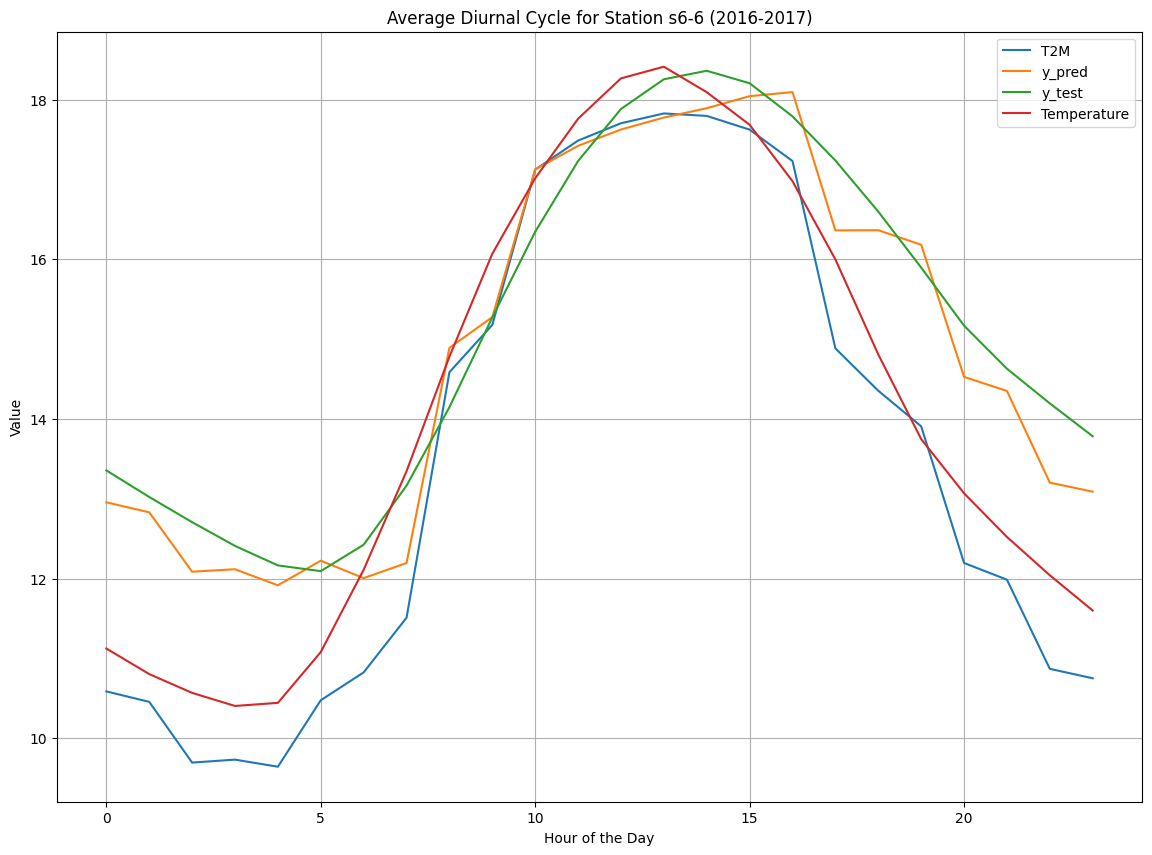

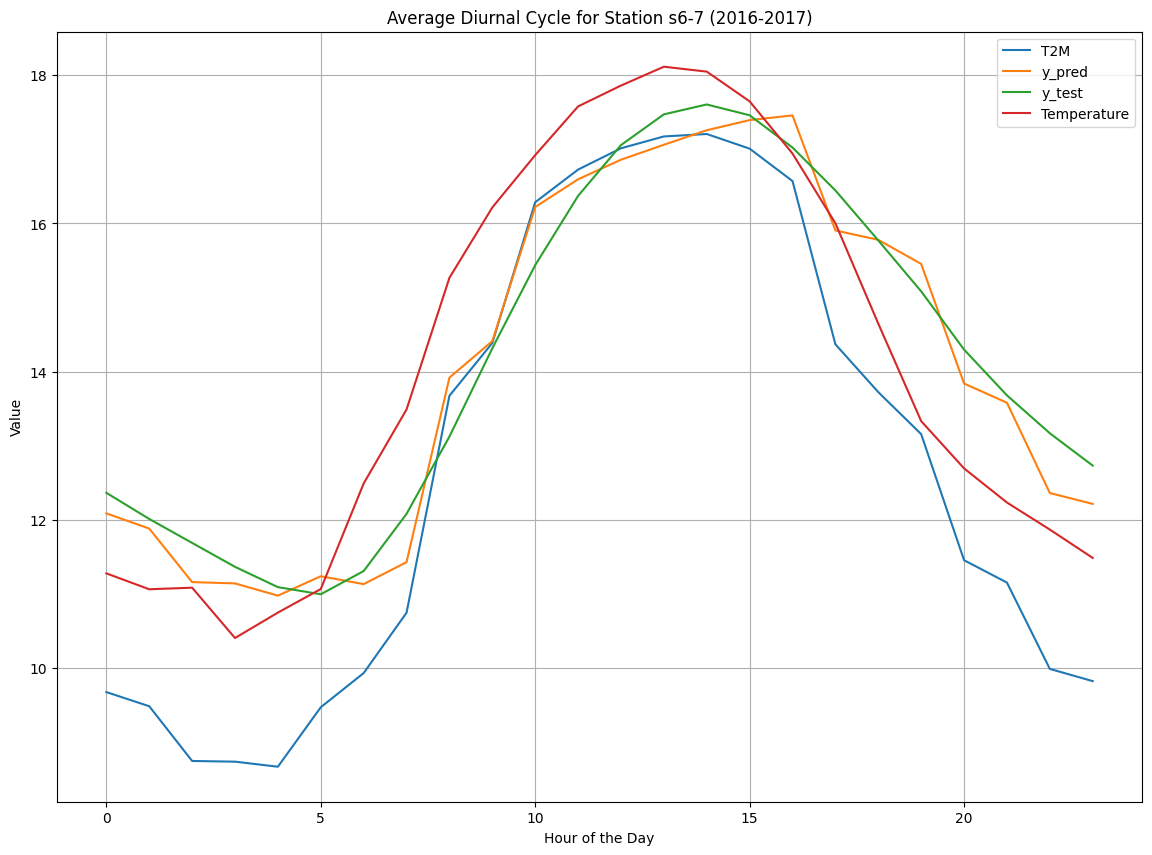

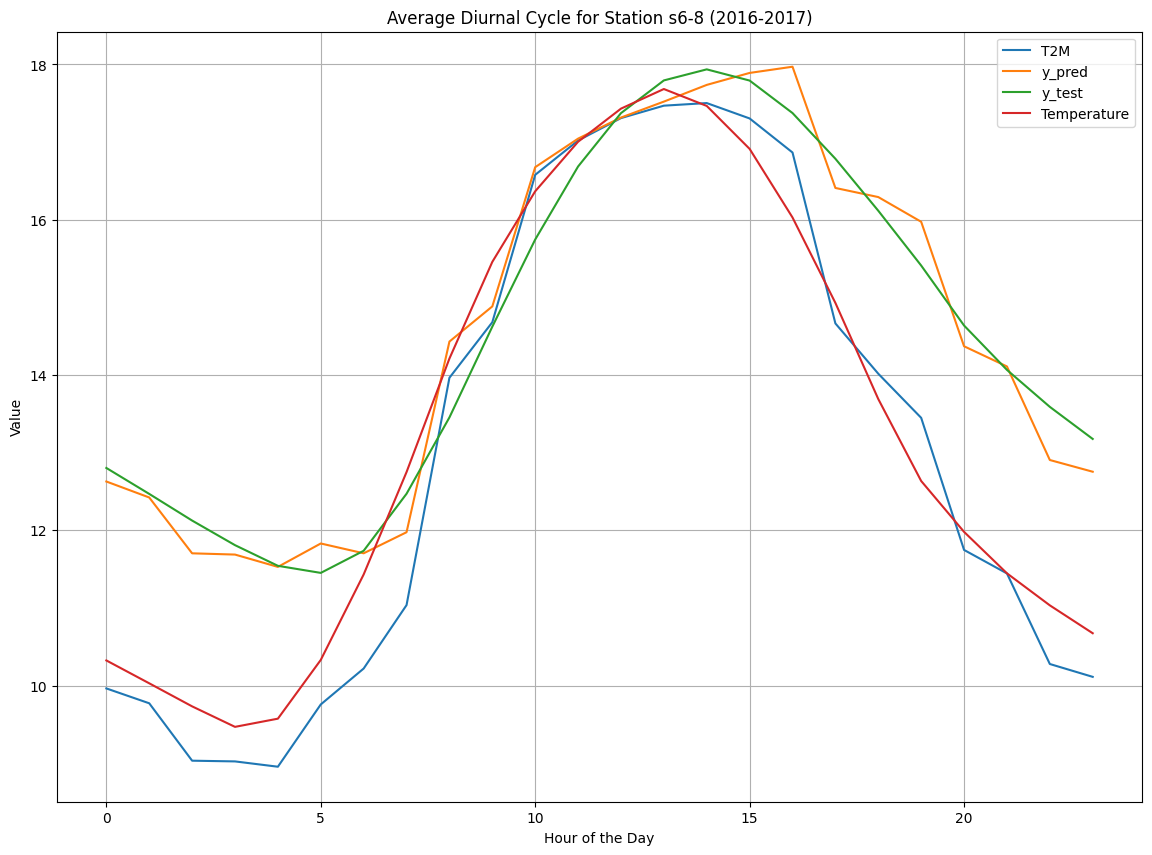

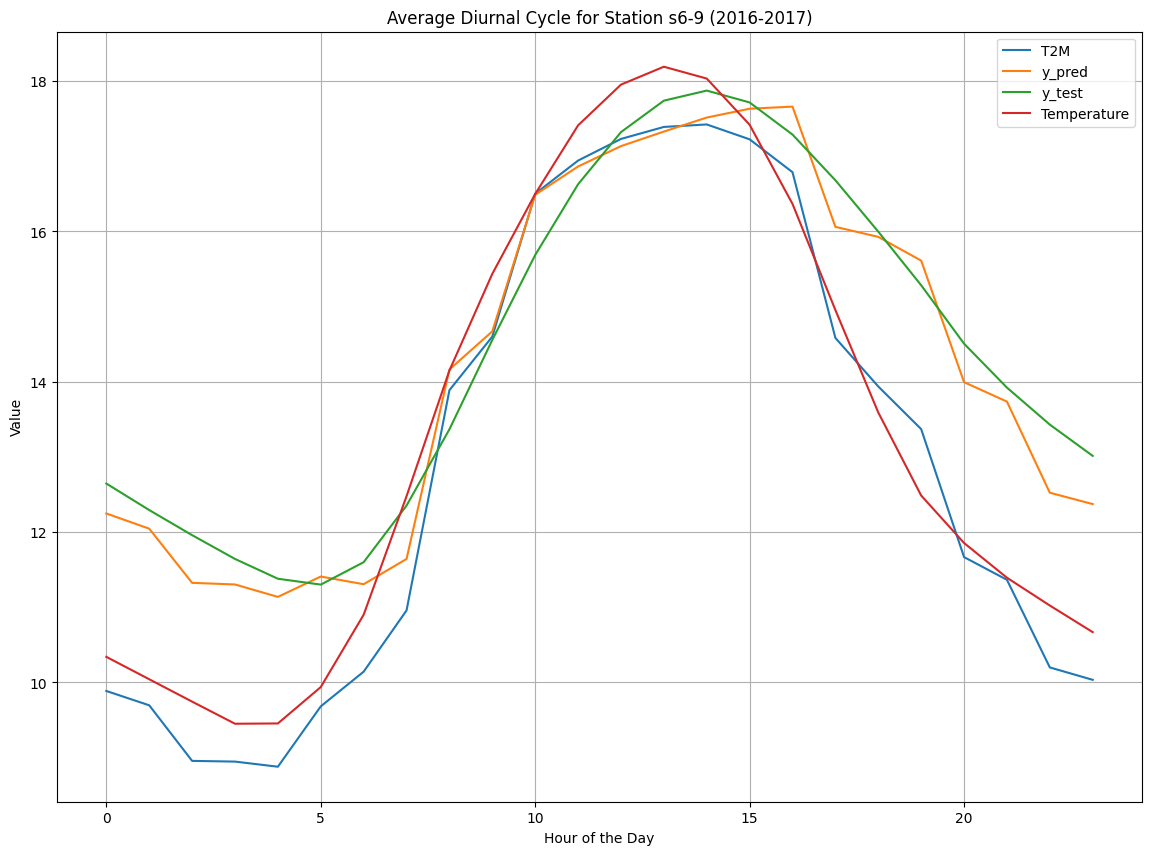

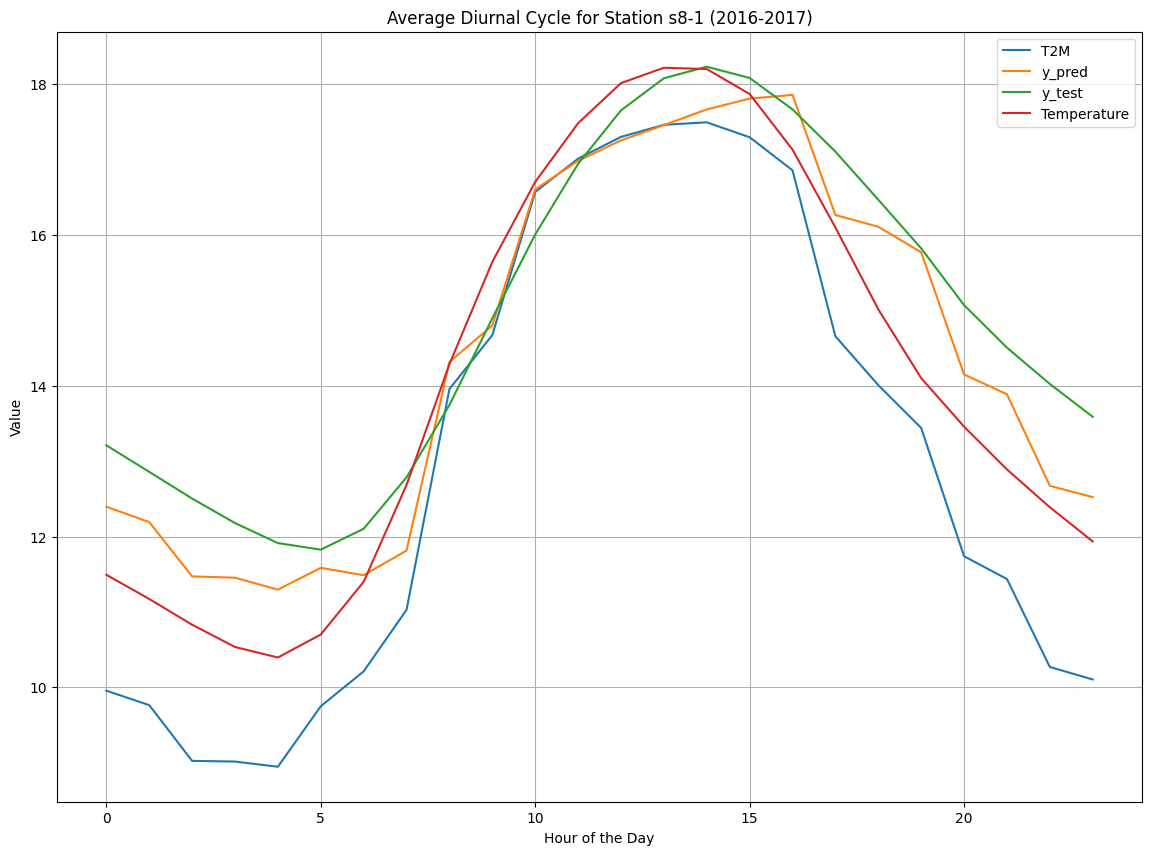

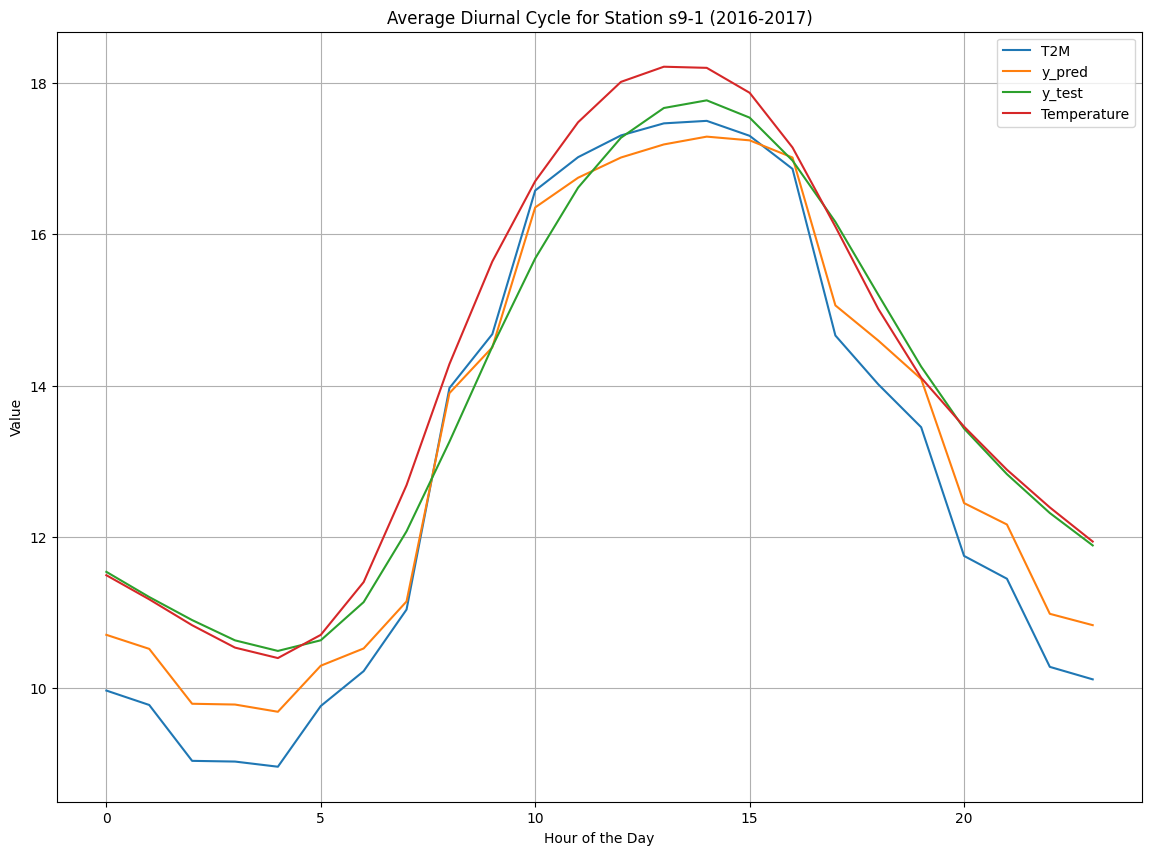

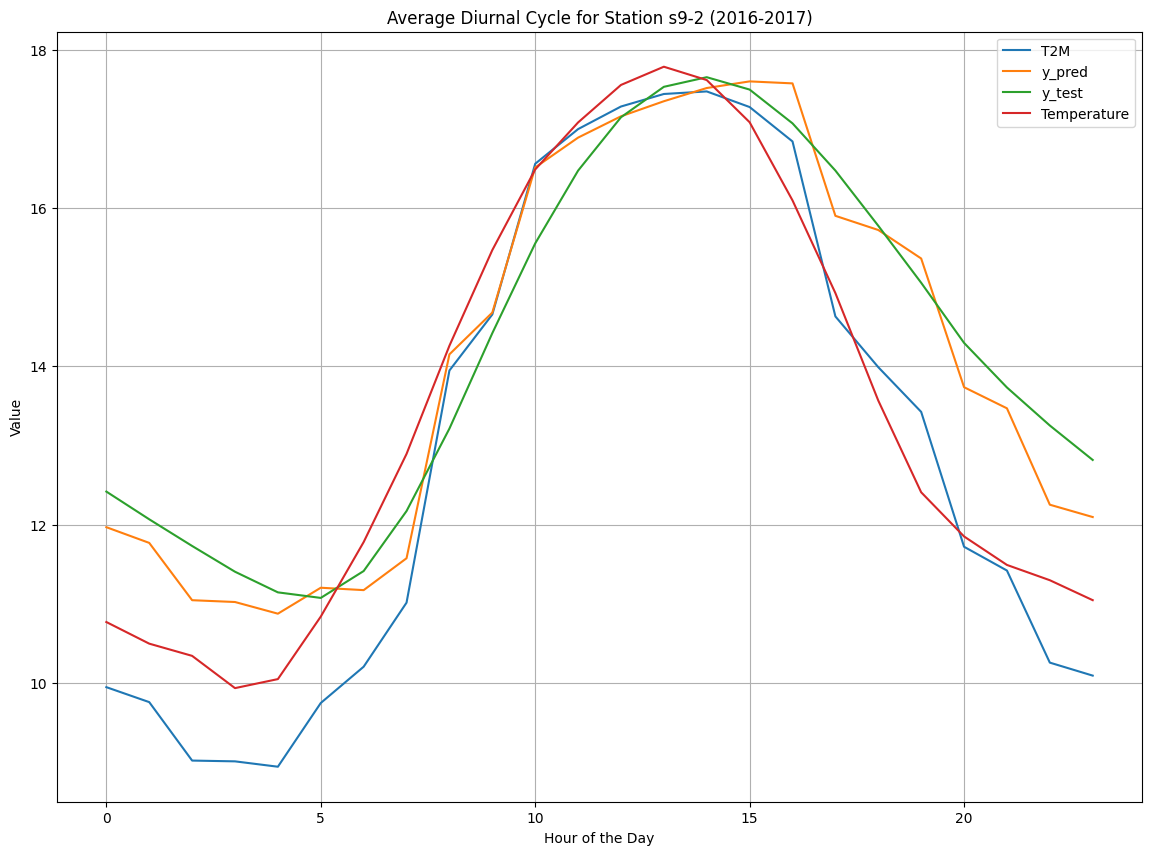

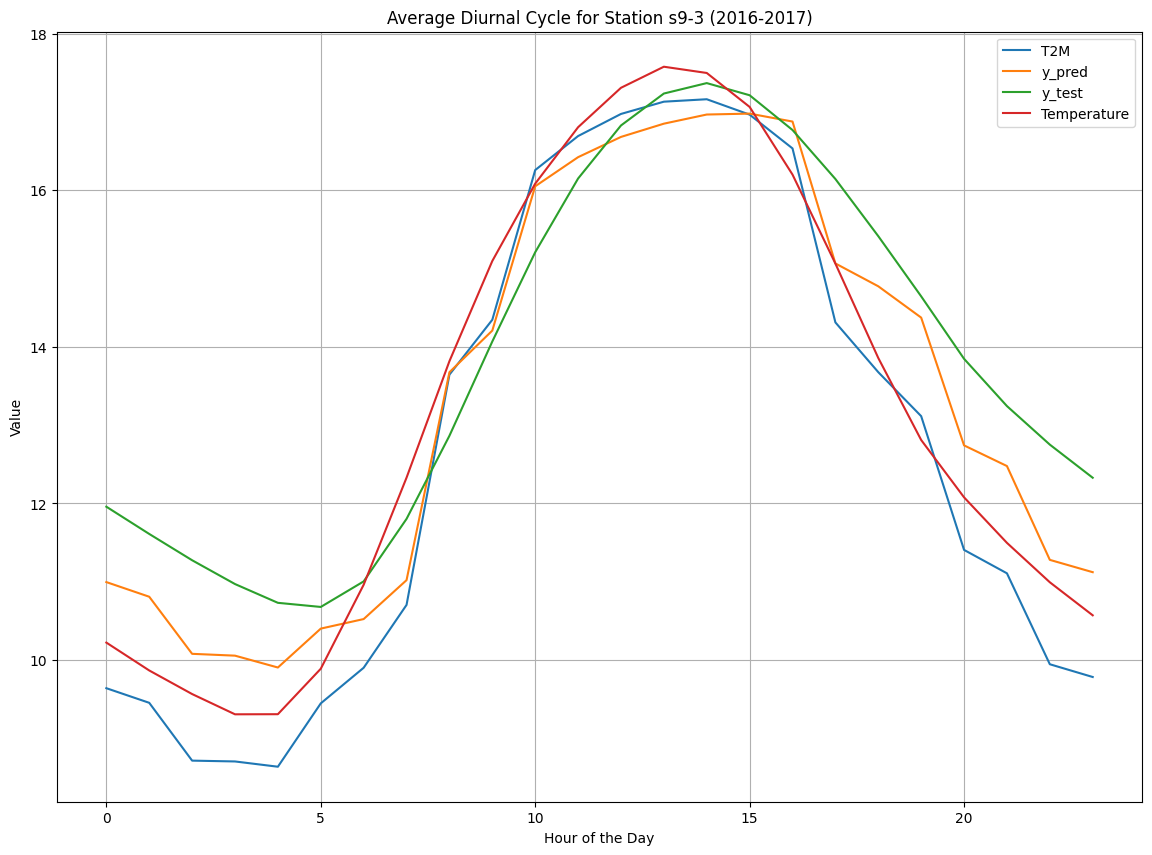

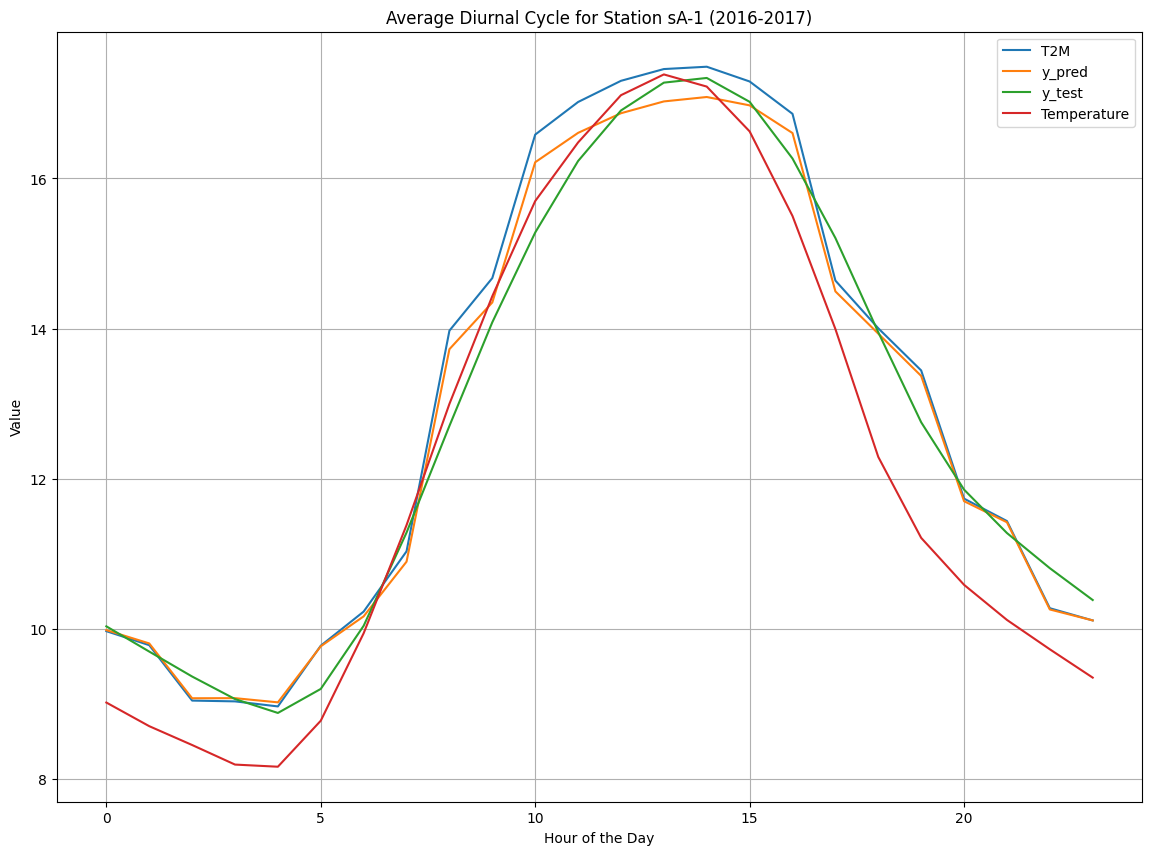

In [ ]:
data=test

import pandas as pd
import matplotlib.pyplot as plt

# Convert DateTime column to datetime type
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Filter data for the months July, August, September and years 2016-2017
data_filtered = data[(data['DateTime'].dt.year.isin([2016, 2017])) &
                     (data['DateTime'].dt.month.isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))]

# Extract hour of the day for grouping
data_filtered = data_filtered.copy()
data_filtered['Hour'] = data_filtered['DateTime'].dt.hour

# Select only numeric columns and the grouping columns
numeric_columns = ['T2M', 'y_pred', 'y_test', 'Temperature']
grouping_columns = ['Station', 'Hour']

# Group data by Station and Hour and calculate the mean for numeric columns
grouped = data_filtered[grouping_columns + numeric_columns].groupby(['Station', 'Hour']).mean().reset_index()

# Plotting the average diurnal cycle for each station
stations = grouped['Station'].unique()

for station in stations:
    plt.figure(figsize=(14, 10))
    station_data = grouped[grouped['Station'] == station]

    for var in numeric_columns:
        plt.plot(station_data['Hour'], station_data[var], label=var)

    plt.title(f'Average Diurnal Cycle for Station {station} (2016-2017)')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
test['LCZ'].unique()
# Display the unique LCZ values
unique_lcz = test['LCZ'].unique()
print("Unique LCZ values:", unique_lcz)

# Count the number of stations per LCZ
stations_per_lcz = test.groupby('LCZ')['Station'].nunique()
print("Number of stations per LCZ:\n", stations_per_lcz)



Unique LCZ values: [ 2.  3.  6.  8.  5. 14. 12.]
Number of stations per LCZ:
 LCZ
2.0      3
3.0      1
5.0      4
6.0     12
8.0      3
12.0     1
14.0     1
Name: Station, dtype: int64


In [ ]:
test_rainy_day = test[(test['SOLAR_ELEV'] > 0) & (test['PRECIP'] > 0.001)]
test_dry_day = test[(test['SOLAR_ELEV'] > 0) & (test['PRECIP'] < 0.001)]
test_rainy_night = test[(test['SOLAR_ELEV'] < 0) & (test['PRECIP'] > 0.001)]
test_dry_night = test[(test['SOLAR_ELEV'] < 0) & (test['PRECIP'] < 0.001)]
test_cloudy_day = test[(test['SOLAR_ELEV'] > 0) & (test['TCC'] > 0.5)]
test_clear_day = test[(test['SOLAR_ELEV'] > 0) & (test['TCC'] < 0.5)]
test_cloudy_night = test[(test['SOLAR_ELEV'] < 0) & (test['TCC'] > 0.5)]
test_clear_night = test[(test['SOLAR_ELEV'] < 0) & (test['TCC'] < 0.5)]
test_windy_day = test[(test['SOLAR_ELEV'] > 0) & (test['WS'] > 4)]
test_calm_day = test[(test['SOLAR_ELEV'] > 0) & (test['WS'] < 4)]
test_windy_night = test[(test['SOLAR_ELEV'] < 0) & (test['WS'] > 4)]
test_calm_night = test[(test['SOLAR_ELEV'] < 0) & (test['WS'] < 4)]


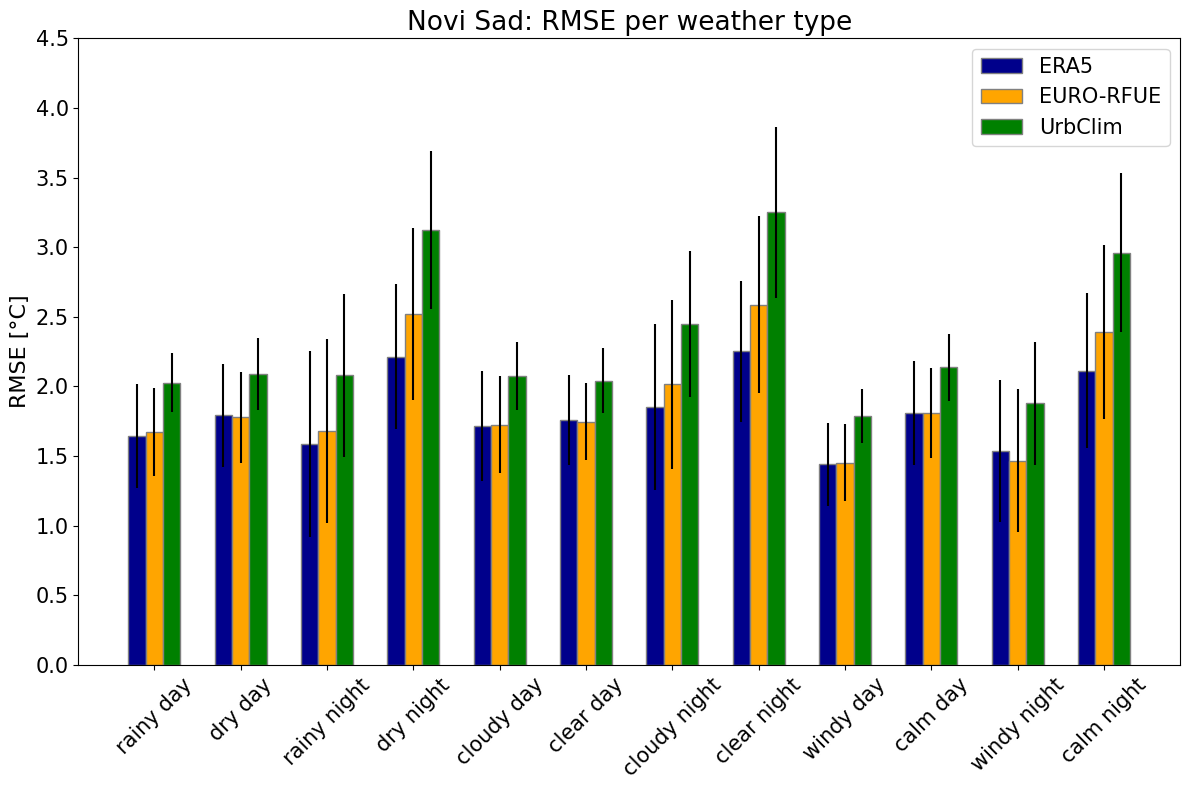

In [ ]:
# Create lists to store RMSEs for each weather type
RMSEs = []
# Define weather types
weather_types = ['rainy_day', 'dry_day', 'rainy_night', 'dry_night', 'cloudy_day', 'clear_day', 'cloudy_night', 'clear_night', 'windy_day', 'calm_day', 'windy_night', 'calm_night']

# Create lists to store RMSEs for each weather type
RMSEs = []

# Calculate RMSEs for each weather type

# Here we generate random RMSE values for demonstration
RMSE_ERA5_list = []
RMSE_y_pred_list = []
RMSE_y_test_list = []

SD_ERA5_list = []
SD_y_pred_list = []
SD_y_test_list = []

for weather_type in weather_types:
    filtered_data = globals()['test_' + weather_type]

    RMSE_ERA5_weather = []
    RMSE_y_pred_weather = []
    RMSE_y_test_weather = []

    for station in filtered_data['Station'].unique():
        station_data = filtered_data[filtered_data['Station'] == station]

        RMSE_ERA5 = np.sqrt(np.mean((station_data['ERA5'] - station_data['Temperature'])**2))
        RMSE_y_pred = np.sqrt(np.mean((station_data['y_pred'] - station_data['Temperature'])**2))
        RMSE_y_test = np.sqrt(np.mean((station_data['y_test'] - station_data['Temperature'])**2))

        RMSE_ERA5_weather.append(RMSE_ERA5)
        RMSE_y_pred_weather.append(RMSE_y_pred)
        RMSE_y_test_weather.append(RMSE_y_test)

    RMSE_ERA5_list.append(np.mean(RMSE_ERA5_weather))
    RMSE_y_pred_list.append(np.mean(RMSE_y_pred_weather))
    RMSE_y_test_list.append(np.mean(RMSE_y_test_weather))

    # Calculate standard deviations (SDs) for error bars
    SD_ERA5_list.append(np.std(RMSE_ERA5_weather))
    SD_y_pred_list.append(np.std(RMSE_y_pred_weather))
    SD_y_test_list.append(np.std(RMSE_y_test_weather))

# Convert lists to NumPy arrays for easier indexing
RMSE_ERA5_list = np.array(RMSE_ERA5_list)
RMSE_y_pred_list = np.array(RMSE_y_pred_list)
RMSE_y_test_list = np.array(RMSE_y_test_list)

SD_ERA5_list = np.array(SD_ERA5_list)
SD_y_pred_list = np.array(SD_y_pred_list)
SD_y_test_list = np.array(SD_y_test_list)

# Plotting RMSEs with error bars
fig, ax = plt.subplots(figsize=(12, 8))

barWidth = 0.2
r1 = np.arange(len(weather_types))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

colors = ['darkblue', 'orange', 'green']
labels = ['ERA5', 'EURO-RFUE', 'UrbClim']

# Plotting with error bars using SDs
ax.bar(r1, RMSE_ERA5_list, color=colors[0], width=barWidth, edgecolor='grey', label=labels[0], yerr=SD_ERA5_list)
ax.bar(r2, RMSE_y_pred_list, color=colors[1], width=barWidth, edgecolor='grey', label=labels[1], yerr=SD_y_pred_list)
ax.bar(r3, RMSE_y_test_list, color=colors[2], width=barWidth, edgecolor='grey', label=labels[2], yerr=SD_y_test_list)

weather_types_labels = ['rainy day', 'dry day', 'rainy night', 'dry night',
                 'cloudy day', 'clear day', 'cloudy night', 'clear night',
                 'windy day', 'calm day', 'windy night', 'calm night']

ax.set_xticks(r2)
ax.set_xticklabels(weather_types_labels, rotation=45, fontsize=15)
ax.tick_params(axis='y', labelsize=15)  # Set yticks font size

ax.set_ylabel('RMSE [°C]', fontsize=16)
ax.set_title('Novi Sad: RMSE per weather type', fontsize=19)
ax.set_ylim(0, 4.5)
ax.legend(fontsize=15)

plt.tight_layout()
plt.show()

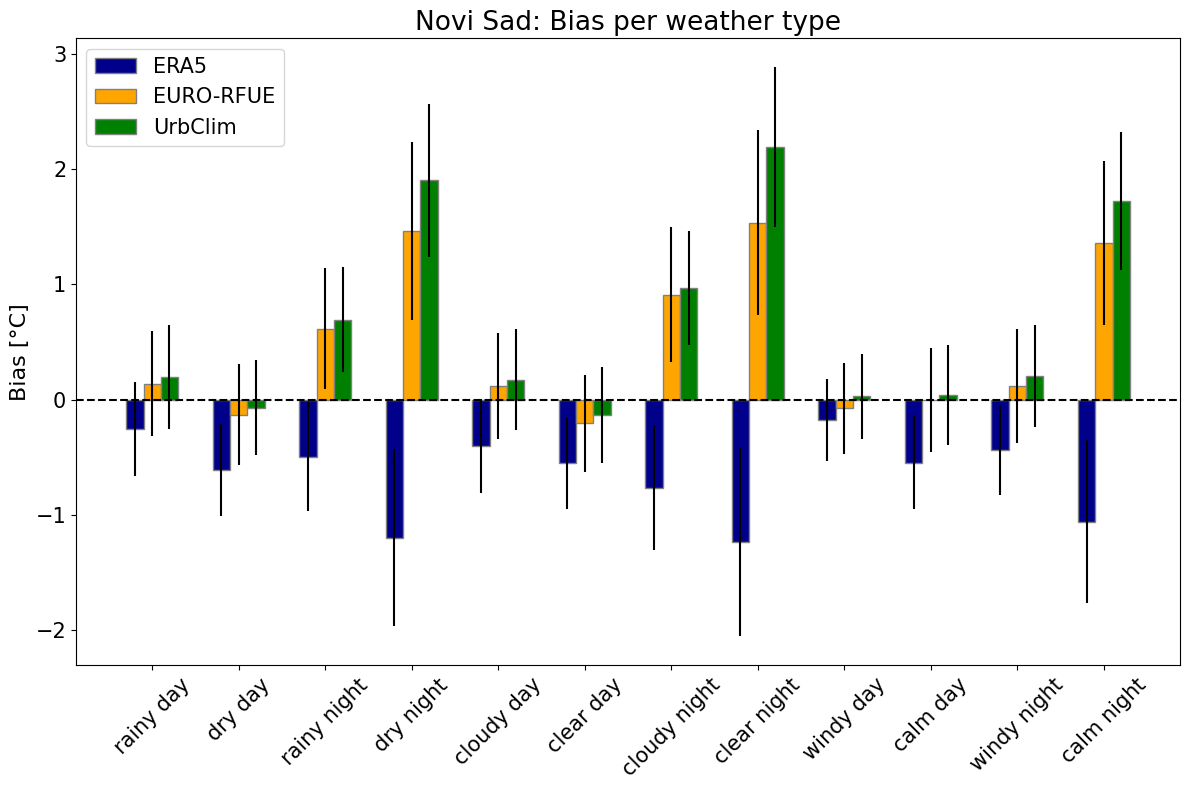

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you have already defined `weather_types` and have data for each weather type

# Create lists to store biases for each weather type
Bias_ERA5_list = []
Bias_y_pred_list = []
Bias_y_test_list = []

SD_Bias_ERA5_list = []
SD_Bias_y_pred_list = []
SD_Bias_y_test_list = []

for weather_type in weather_types:
    filtered_data = globals()['test_' + weather_type]

    Bias_ERA5_weather = []
    Bias_y_pred_weather = []
    Bias_y_test_weather = []

    for station in filtered_data['Station'].unique():
        station_data = filtered_data[filtered_data['Station'] == station]

        Bias_ERA5 = np.mean(station_data['ERA5'] - station_data['Temperature'])
        Bias_y_pred = np.mean(station_data['y_pred'] - station_data['Temperature'])
        Bias_y_test = np.mean(station_data['y_test'] - station_data['Temperature'])

        Bias_ERA5_weather.append(Bias_ERA5)
        Bias_y_pred_weather.append(Bias_y_pred)
        Bias_y_test_weather.append(Bias_y_test)

    Bias_ERA5_list.append(np.mean(Bias_ERA5_weather))
    Bias_y_pred_list.append(np.mean(Bias_y_pred_weather))
    Bias_y_test_list.append(np.mean(Bias_y_test_weather))

    # Calculate standard deviations (SDs) for error bars
    SD_Bias_ERA5_list.append(np.std(Bias_ERA5_weather))
    SD_Bias_y_pred_list.append(np.std(Bias_y_pred_weather))
    SD_Bias_y_test_list.append(np.std(Bias_y_test_weather))

# Convert lists to NumPy arrays for easier indexing
Bias_ERA5_list = np.array(Bias_ERA5_list)
Bias_y_pred_list = np.array(Bias_y_pred_list)
Bias_y_test_list = np.array(Bias_y_test_list)

SD_Bias_ERA5_list = np.array(SD_Bias_ERA5_list)
SD_Bias_y_pred_list = np.array(SD_Bias_y_pred_list)
SD_Bias_y_test_list = np.array(SD_Bias_y_test_list)

# Plotting biases with error bars
fig, ax = plt.subplots(figsize=(12, 8))

barWidth = 0.2
r1 = np.arange(len(weather_types))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

colors = ['darkblue', 'orange', 'green']
labels = ['ERA5', 'EURO-RFUE', 'UrbClim']

# Plotting with error bars using SDs
ax.bar(r1, Bias_ERA5_list, color=colors[0], width=barWidth, edgecolor='grey', label=labels[0], yerr=SD_Bias_ERA5_list)
ax.bar(r2, Bias_y_pred_list, color=colors[1], width=barWidth, edgecolor='grey', label=labels[1], yerr=SD_Bias_y_pred_list)
ax.bar(r3, Bias_y_test_list, color=colors[2], width=barWidth, edgecolor='grey', label=labels[2], yerr=SD_Bias_y_test_list)

weather_types_labels = ['rainy day', 'dry day', 'rainy night', 'dry night',
                 'cloudy day', 'clear day', 'cloudy night', 'clear night',
                 'windy day', 'calm day', 'windy night', 'calm night']

ax.set_xticks(r2)
ax.set_xticklabels(weather_types_labels, rotation=45, fontsize=15)
ax.tick_params(axis='y', labelsize=15)  # Set yticks font size
ax.axhline(y=0, color='black', linestyle='--')

ax.set_ylabel('Bias [°C]', fontsize=16)
ax.set_title('Novi Sad: Bias per weather type', fontsize=19)
# Depending on your data, adjust ylim accordingly
# ax.set_ylim(your_min_value, your_max_value)
#ax.set_ylim(-2.8, 2.8)

ax.legend(fontsize=15, loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
prediction_data = []
validation_data = []

# Initialize lists for bias and RMSE per LCZ
bias_per_lcz = []
rmse_per_lcz = []

# Loop over LCZs
for lcz, group in test.groupby('LCZ'):
    unique_stations = group['Station'].unique()

    # Check if there are 2 or more unique stations per LCZ
    if len(unique_stations) >= 2:
        # Select one station for prediction and the others for validation
        prediction_station = unique_stations[0]
        validation_stations = unique_stations[1:]

        # Filter the data on the LCZ and split it into prediction and validation sets
        prediction_set = group[group['Station'] == prediction_station]
        validation_set = group[group['Station'].isin(validation_stations)]

        # Calculate bias and RMSE for each DateTime
        bias_list = []
        rmse_list = []
        for datetime, pred_temp in prediction_set[['DateTime', 'Temperature']].values:
            val_temp = validation_set[validation_set['DateTime'] == datetime]['Temperature'].values
            if len(val_temp) > 0:
                bias = pred_temp - val_temp[0]
                rmse = np.sqrt(mean_squared_error([pred_temp], [val_temp[0]]))
                bias_list.append(bias)
                rmse_list.append(rmse)

        # Calculate mean bias and RMSE for the LCZ
        mean_bias = np.mean(bias_list)
        mean_rmse = np.mean(rmse_list)
        bias_per_lcz.append(mean_bias)
        rmse_per_lcz.append(mean_rmse)

# Print bias and RMSE per LCZ
for lcz, bias, rmse in zip(test['LCZ'].unique(), bias_per_lcz, rmse_per_lcz):
    print(f"LCZ {lcz}: Bias = {bias}, RMSE = {rmse}")

LCZ 2.0: Bias = 0.17256011315417258, RMSE = 0.7035714285714285
LCZ 3.0: Bias = 0.270538661008958, RMSE = 0.5802982083922678
LCZ 6.0: Bias = 0.15968882602545967, RMSE = 0.3291725601131542
LCZ 8.0: Bias = -0.2620049504950495, RMSE = 0.7303807166430929
